# Codon Usage

### Abstract: 
DNA codon usage frequencies of a large sample of diverse biological organisms from different taxa

### Source:
Bohdan Khomtchouk, Ph.D. University of Chicago, Department of Medicine, Section of Computational Biomedicine and Biomedical Data Science.

#### Date Donated: 2020-10-03

### Attribute Information:

- Column 1: Kingdom 
- Column 2: DNAtype 
- Column 3: SpeciesID 
- Column 4: Ncodons 
- Column 5: SpeciesName 
- Columns 6-69: codon (header: nucleotide bases; entries: frequency of usage (5 digit floating point number)) 

### Nucleotides bases

- A : Adenine
- C : Cytosine
- G : Guanine
- U : Uracil

## Problem Statement :

### Classifying different species into their Kingdom types on the basis of codon frequency usage as input features with Genomic DNA type.

#### Class labels: 
1. Virus 
2. Bacteria 
3. Plants
4. Vertebrates
5. Invertebrates

## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(action='ignore')

## Reading dataset

In [3]:
data_dir = Path('../data')
data_path = data_dir / 'codon_usage_dataset_processed.csv'

df = pd.read_csv(data_path)

In [4]:
df.head()

Kingdom  SpeciesID  Ncodons                              SpeciesName  \
0     vrl     100217     1995  Epizootic haematopoietic necrosis virus   
1     vrl     100220     1474                         Bohle iridovirus   
2     vrl     100755     4862             Sweet potato leaf curl virus   
3     vrl     100880     1915             Northern cereal mosaic virus   
4     vrl     100887    22831           Soil-borne cereal mosaic virus   

       UUU      UUC      UUA      UUG      CUU      CUC  ...      CGG  \
0  0.01654  0.01203  0.00050  0.00351  0.01203  0.03208  ...  0.00451   
1  0.02714  0.01357  0.00068  0.00678  0.00407  0.02849  ...  0.00136   
2  0.01974  0.02180  0.01357  0.01543  0.00782  0.01111  ...  0.00596   
3  0.01775  0.02245  0.01619  0.00992  0.01567  0.01358  ...  0.00366   
4  0.02816  0.01371  0.00767  0.03679  0.01380  0.00548  ...  0.00604   

       AGA      AGG      GAU      GAC      GAA      GAG      UAA      UAG  \
0  0.01303  0.03559  0.01003  0.04612  0.01203  0.04361  0.00251  0.00050   
1  0.01696  0.03596  0.01221  0.04545  0.01560  0.04410  0.00271  0.00068   
2  0.01974  0.02489  0.03126  0.02036  0.02242  0.02468  0.00391  0.00000   
3  0.01410  0.01671  0.03760  0.01932  0.03029  0.03446  0.00261  0.00157   
4  0.01494  0.01734  0.04148  0.02483  0.03359  0.03679  0.00000  0.00044   

       UGA  
0  0.00000  
1  0.00000  
2  0.00144  
3  0.00000  
4  0.00131  

[5 rows x 68 columns]

In [5]:
df.shape

(8657, 68)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8657 entries, 0 to 8656
Data columns (total 68 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      8657 non-null   object 
 1   SpeciesID    8657 non-null   int64  
 2   Ncodons      8657 non-null   int64  
 3   SpeciesName  8657 non-null   object 
 4   UUU          8657 non-null   float64
 5   UUC          8657 non-null   float64
 6   UUA          8657 non-null   float64
 7   UUG          8657 non-null   float64
 8   CUU          8657 non-null   float64
 9   CUC          8657 non-null   float64
 10  CUA          8657 non-null   float64
 11  CUG          8657 non-null   float64
 12  AUU          8657 non-null   float64
 13  AUC          8657 non-null   float64
 14  AUA          8657 non-null   float64
 15  AUG          8657 non-null   float64
 16  GUU          8657 non-null   float64
 17  GUC          8657 non-null   float64
 18  GUA          8657 non-null   float64
 19  GUG   

### Dividing dataset into features and labels dataframes

In [6]:
labels = df[['Kingdom']].copy()

In [7]:
labels.head()

Kingdom
0     vrl
1     vrl
2     vrl
3     vrl
4     vrl

In [8]:
features = df.drop(columns=['Kingdom','SpeciesID','SpeciesName'])

In [9]:
features.head()

Ncodons      UUU      UUC      UUA      UUG      CUU      CUC      CUA  \
0     1995  0.01654  0.01203  0.00050  0.00351  0.01203  0.03208  0.00100   
1     1474  0.02714  0.01357  0.00068  0.00678  0.00407  0.02849  0.00204   
2     4862  0.01974  0.02180  0.01357  0.01543  0.00782  0.01111  0.01028   
3     1915  0.01775  0.02245  0.01619  0.00992  0.01567  0.01358  0.00940   
4    22831  0.02816  0.01371  0.00767  0.03679  0.01380  0.00548  0.00473   

       CUG      AUU  ...      CGG      AGA      AGG      GAU      GAC  \
0  0.04010  0.00551  ...  0.00451  0.01303  0.03559  0.01003  0.04612   
1  0.04410  0.01153  ...  0.00136  0.01696  0.03596  0.01221  0.04545   
2  0.01193  0.02283  ...  0.00596  0.01974  0.02489  0.03126  0.02036   
3  0.01723  0.02402  ...  0.00366  0.01410  0.01671  0.03760  0.01932   
4  0.02076  0.02716  ...  0.00604  0.01494  0.01734  0.04148  0.02483   

       GAA      GAG      UAA      UAG      UGA  
0  0.01203  0.04361  0.00251  0.00050  0.00000  
1  0.01560  0.04410  0.00271  0.00068  0.00000  
2  0.02242  0.02468  0.00391  0.00000  0.00144  
3  0.03029  0.03446  0.00261  0.00157  0.00000  
4  0.03359  0.03679  0.00000  0.00044  0.00131  

[5 rows x 65 columns]

### Splitting dataset into training and testing sets using Stratified strategy (70-30 split)

In [10]:
train_features, test_features, train_labels, test_labels = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.3,
                                                                            stratify=labels,
                                                                            random_state=0)

In [11]:
print('====================')
print(' Train-Test Split')
print('====================')
print('')
print('Overall class ratio:')
print('{}'.format(labels.value_counts() / len(labels)))
print(' ')
print('Train set class ratio:')
print('{}'.format(train_labels.value_counts() / len(train_labels)))
print(' ')
print('Test set class ratio:')
print('{}'.format(test_labels.value_counts() / len(test_labels)))

 Train-Test Split

Overall class ratio:
Kingdom
bct        0.336953
vrl        0.327019
pln        0.175927
inv        0.106503
vrt        0.053598
dtype: float64
 
Train set class ratio:
Kingdom
bct        0.337019
vrl        0.326952
pln        0.175937
inv        0.106453
vrt        0.053639
dtype: float64
 
Test set class ratio:
Kingdom
bct        0.336798
vrl        0.327175
pln        0.175905
inv        0.106620
vrt        0.053503
dtype: float64


### Label Encoding training labels

In [12]:
original_labels = pd.DataFrame()
original_labels['Kingdom'] = train_labels['Kingdom'].values

In [13]:
original_labels.head()

Kingdom
0     bct
1     vrl
2     vrl
3     bct
4     bct

In [14]:
label_encoder = LabelEncoder()
train_labels_encoded = pd.DataFrame()
train_labels_encoded['Kingdom_encoded'] = label_encoder.fit_transform(train_labels)
train_labels_encoded['Kingdom'] = original_labels.Kingdom

In [15]:
train_labels_encoded.head()

Kingdom_encoded Kingdom
0                0     bct
1                3     vrl
2                3     vrl
3                0     bct
4                0     bct

### Scaling training features using Standard Scaler

In [16]:
sc = StandardScaler().fit(train_features)

In [17]:
train_features_scaled = pd.DataFrame()
train_features_scaled[train_features.columns] = sc.fit_transform(train_features[train_features.columns])

In [18]:
train_features_scaled.head()

Ncodons       UUU       UUC       UUA       UUG       CUU       CUC  \
0  0.086021 -0.890722  0.675071 -0.850957  0.075349 -0.905848 -0.222610   
1 -0.134782 -0.381782 -0.046220 -0.310598  0.726854  0.079095 -0.264204   
2 -0.134480 -0.211541  0.540034 -0.019351 -0.756246  0.596328 -0.103501   
3  1.597507  0.195789 -0.480971 -0.000132 -0.278211 -0.478031 -0.440032   
4  0.739657  0.815253 -0.563310  2.208614  0.873839 -0.021325 -1.042196   

        CUA       CUG       AUU  ...       CGG       AGA       AGG       GAU  \
0 -1.140677  2.693982 -0.802628  ...  0.567047 -1.064551 -0.699708 -0.673319   
1 -1.421482 -0.348166 -0.404451  ...  0.472994 -0.141964  1.787475 -0.289117   
2  0.315126 -0.505986 -0.360660  ...  0.117227  0.114788  2.210134 -0.291628   
3 -0.792161  1.767988  0.670869  ... -0.189468 -1.153002 -1.146750  0.291789   
4 -0.595000 -0.376449  1.781871  ... -0.160843 -0.942932 -1.200395  0.523649   

        GAC       GAA       GAG       UAA       UAG       UGA  
0  0.658901 -0.031225 -0.136166 -0.661516 -0.585953  1.136606  
1  0.689306 -0.414356  0.242410 -0.425924  1.961586 -0.257373  
2 -0.306059 -0.087427 -0.932753  1.341019  0.004003  0.588412  
3 -0.513294  0.617836 -0.767914  0.404849 -0.478688 -0.077252  
4 -0.849350  1.438245 -1.389410  0.696240 -0.036221 -0.492314  

[5 rows x 65 columns]

## Data Visualization

### 1. Kingdom labels count

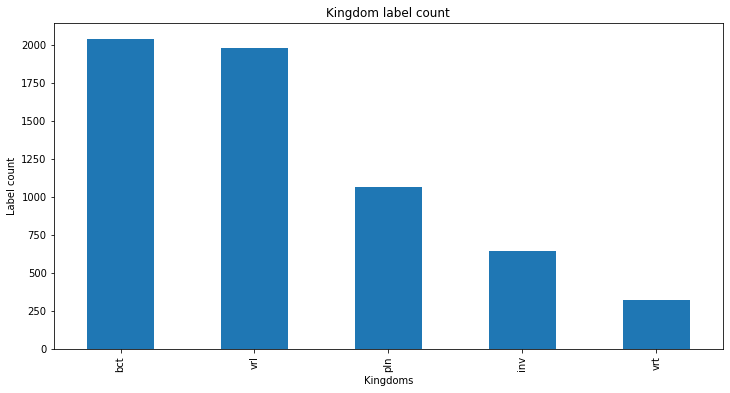

In [41]:
plt.figure(figsize=(12,6))
train_labels['Kingdom'].value_counts().plot(kind='bar')
plt.title('Kingdom label count')
plt.xlabel('Kingdoms')
plt.ylabel('Label count')
plt.show()

### 2. Ncodons by Kingdom

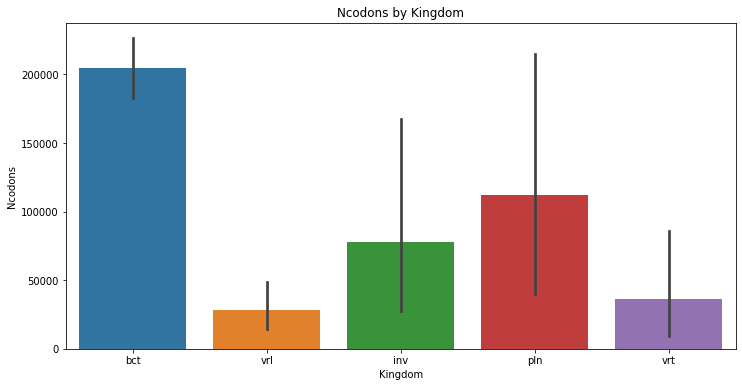

In [42]:
plt.figure(figsize=[12,6])
sns.barplot(train_labels['Kingdom'], train_features['Ncodons'])
plt.title('Ncodons by Kingdom')
plt.show()

### 3. Correlation heatmap for all the features

In [21]:
corr_matrix = train_features_scaled.corr()
corr_matrix

Ncodons       UUU       UUC       UUA       UUG       CUU       CUC  \
Ncodons  1.000000 -0.016818 -0.010900  0.001256 -0.007746 -0.016821  0.026262   
UUU     -0.016818  1.000000 -0.583265  0.716027  0.381312  0.429155 -0.641527   
UUC     -0.010900 -0.583265  1.000000 -0.627028 -0.257889 -0.208399  0.612856   
UUA      0.001256  0.716027 -0.627028  1.000000  0.176705  0.203770 -0.646826   
UUG     -0.007746  0.381312 -0.257889  0.176705  1.000000  0.335159 -0.362071   
...           ...       ...       ...       ...       ...       ...       ...   
GAA      0.011828  0.487102 -0.489135  0.634765  0.279057  0.300396 -0.575340   
GAG      0.013744 -0.554716  0.405695 -0.592513 -0.237744 -0.234626  0.553533   
UAA     -0.017734  0.187649 -0.100361  0.251442  0.012452  0.075450 -0.228046   
UAG      0.005528 -0.006579  0.003347  0.027331  0.006483  0.048787 -0.005721   
UGA      0.021262 -0.108145  0.053045 -0.037018 -0.155997 -0.149913  0.124822   

              CUA       CUG       AUU  ...       CGG       AGA       AGG  \
Ncodons -0.028493  0.068527 -0.009161  ...  0.060894 -0.042824 -0.043360   
UUU      0.426969 -0.598703  0.760733  ... -0.519051  0.442328  0.021769   
UUC     -0.384893  0.414181 -0.563258  ...  0.269683 -0.384137  0.010905   
UUA      0.438240 -0.593770  0.777703  ... -0.436414  0.449933 -0.128077   
UUG      0.261651 -0.343398  0.353773  ... -0.305437  0.235929  0.130615   
...           ...       ...       ...  ...       ...       ...       ...   
GAA      0.308655 -0.470281  0.625298  ... -0.427818  0.412069 -0.150183   
GAG     -0.330602  0.512870 -0.608046  ...  0.462107 -0.303240  0.210518   
UAA      0.070055 -0.227600  0.253876  ... -0.226438  0.172920 -0.038913   
UAG      0.053722 -0.066888  0.008172  ... -0.020457  0.089934  0.108768   
UGA     -0.158201  0.195918 -0.095606  ...  0.250592 -0.112034 -0.058304   

              GAU       GAC       GAA       GAG       UAA       UAG       UGA  
Ncodons -0.012214  0.004997  0.011828  0.013744 -0.017734  0.005528  0.021262  
UUU      0.619733 -0.681569  0.487102 -0.554716  0.187649 -0.006579 -0.108145  
UUC     -0.538744  0.521527 -0.489135  0.405695 -0.100361  0.003347  0.053045  
UUA      0.639232 -0.632426  0.634765 -0.592513  0.251442  0.027331 -0.037018  
UUG      0.381462 -0.407009  0.279057 -0.237744  0.012452  0.006483 -0.155997  
...           ...       ...       ...       ...       ...       ...       ...  
GAA      0.636388 -0.511796  1.000000 -0.493238  0.225837  0.007472 -0.085347  
GAG     -0.503857  0.567197 -0.493238  1.000000 -0.238153 -0.022434  0.070472  
UAA      0.171186 -0.230457  0.225837 -0.238153  1.000000  0.308090  0.044967  
UAG      0.007284 -0.073621  0.007472 -0.022434  0.308090  1.000000  0.047848  
UGA     -0.141880  0.123189 -0.085347  0.070472  0.044967  0.047848  1.000000  

[65 rows x 65 columns]

### Checking for highly correlated columns (above 0.95) and dropping them

In [22]:
# Code snippet taken from examples provided by professor

# Now get a list of columns in `upper` that contain feature values correlated above 0.95
upper_triangle_locations = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

# `upper` now contains just the upper triangle of correlations, with the rest as NaNs
upper = corr_matrix.where(upper_triangle_locations)

In [23]:
upper

Ncodons       UUU       UUC       UUA       UUG       CUU       CUC  \
Ncodons      NaN -0.016818 -0.010900  0.001256 -0.007746 -0.016821  0.026262   
UUU          NaN       NaN -0.583265  0.716027  0.381312  0.429155 -0.641527   
UUC          NaN       NaN       NaN -0.627028 -0.257889 -0.208399  0.612856   
UUA          NaN       NaN       NaN       NaN  0.176705  0.203770 -0.646826   
UUG          NaN       NaN       NaN       NaN       NaN  0.335159 -0.362071   
...          ...       ...       ...       ...       ...       ...       ...   
GAA          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
GAG          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
UAA          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
UAG          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
UGA          NaN       NaN       NaN       NaN       NaN       NaN       NaN   

              CUA       CUG       AUU  ...       CGG       AGA       AGG  \
Ncodons -0.028493  0.068527 -0.009161  ...  0.060894 -0.042824 -0.043360   
UUU      0.426969 -0.598703  0.760733  ... -0.519051  0.442328  0.021769   
UUC     -0.384893  0.414181 -0.563258  ...  0.269683 -0.384137  0.010905   
UUA      0.438240 -0.593770  0.777703  ... -0.436414  0.449933 -0.128077   
UUG      0.261651 -0.343398  0.353773  ... -0.305437  0.235929  0.130615   
...           ...       ...       ...  ...       ...       ...       ...   
GAA           NaN       NaN       NaN  ...       NaN       NaN       NaN   
GAG           NaN       NaN       NaN  ...       NaN       NaN       NaN   
UAA           NaN       NaN       NaN  ...       NaN       NaN       NaN   
UAG           NaN       NaN       NaN  ...       NaN       NaN       NaN   
UGA           NaN       NaN       NaN  ...       NaN       NaN       NaN   

              GAU       GAC       GAA       GAG       UAA       UAG       UGA  
Ncodons -0.012214  0.004997  0.011828  0.013744 -0.017734  0.005528  0.021262  
UUU      0.619733 -0.681569  0.487102 -0.554716  0.187649 -0.006579 -0.108145  
UUC     -0.538744  0.521527 -0.489135  0.405695 -0.100361  0.003347  0.053045  
UUA      0.639232 -0.632426  0.634765 -0.592513  0.251442  0.027331 -0.037018  
UUG      0.381462 -0.407009  0.279057 -0.237744  0.012452  0.006483 -0.155997  
...           ...       ...       ...       ...       ...       ...       ...  
GAA           NaN       NaN       NaN -0.493238  0.225837  0.007472 -0.085347  
GAG           NaN       NaN       NaN       NaN -0.238153 -0.022434  0.070472  
UAA           NaN       NaN       NaN       NaN       NaN  0.308090  0.044967  
UAG           NaN       NaN       NaN       NaN       NaN       NaN  0.047848  
UGA           NaN       NaN       NaN       NaN       NaN       NaN       NaN  

[65 rows x 65 columns]

In [24]:
# Code snippet taken from examples provided by professor

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(f'{len(to_drop)} columns to drop: {to_drop}')

0 columns to drop: []


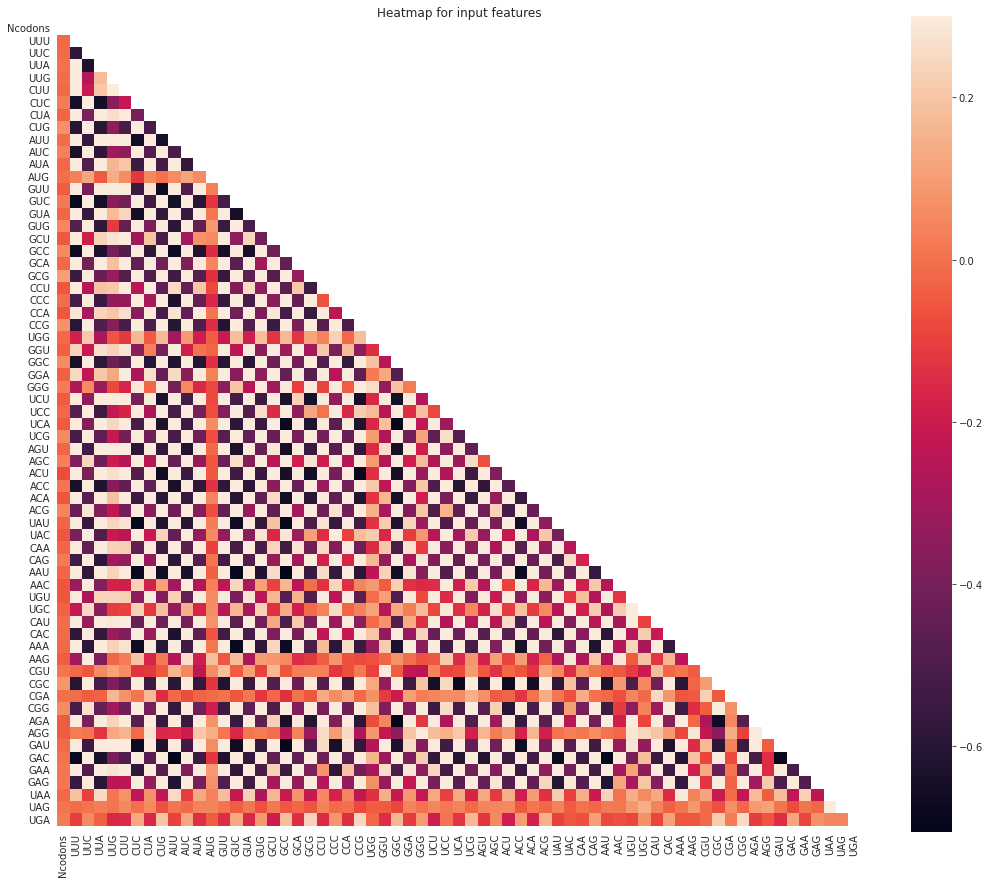

In [43]:
# code taken from seaborn heatmap

corr = train_features_scaled.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 15))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
plt.title('Heatmap for input features')
plt.show()

### Extracting dataframes according class labels for visualization

In [26]:
virus = train_features_scaled[train_labels_encoded['Kingdom'] == 'vrl']
bacteria = train_features_scaled[train_labels_encoded['Kingdom'] == 'bct']
plant = train_features_scaled[train_labels_encoded['Kingdom'] == 'pln']
invertebrate = train_features_scaled[train_labels_encoded['Kingdom'] == 'inv']
vertebrate = train_features_scaled[train_labels_encoded['Kingdom'] == 'vrt']

In [27]:
# code snippet taken from examples provided by professor

def plot_histograms(feature):
    f, ax = plt.subplots(figsize=(15,8))

    x1 = feature

    ax.hist(virus[x1], density=True, alpha=.7, label='virus', bins=10, edgecolor='k')
    ax.hist(plant[x1], density=True, alpha=.7, label='plant', bins=10, edgecolor='k')
    ax.hist(bacteria[x1], density=True, alpha=.7, label='bacteria', bins=10, edgecolor='k')
    ax.hist(invertebrate[x1], density=True, alpha=.7, label='invertebrate', bins=10, edgecolor='k')
    ax.hist(vertebrate[x1], density=True, alpha=.7, label='vertebrate', bins=10, edgecolor='k')

    # Annotate Plot
    ax.set(xlabel=r'$x$: '+x1,
           ylabel=r'$p(x|\omega_{j})$',
           title='Probability Density Function (PDF) for '+x1)

    ax.legend(frameon=True)
    ax.grid(linestyle=':')
    plt.tight_layout()

    plt.show()

### 4. Histograms on all features (codon frequencies)

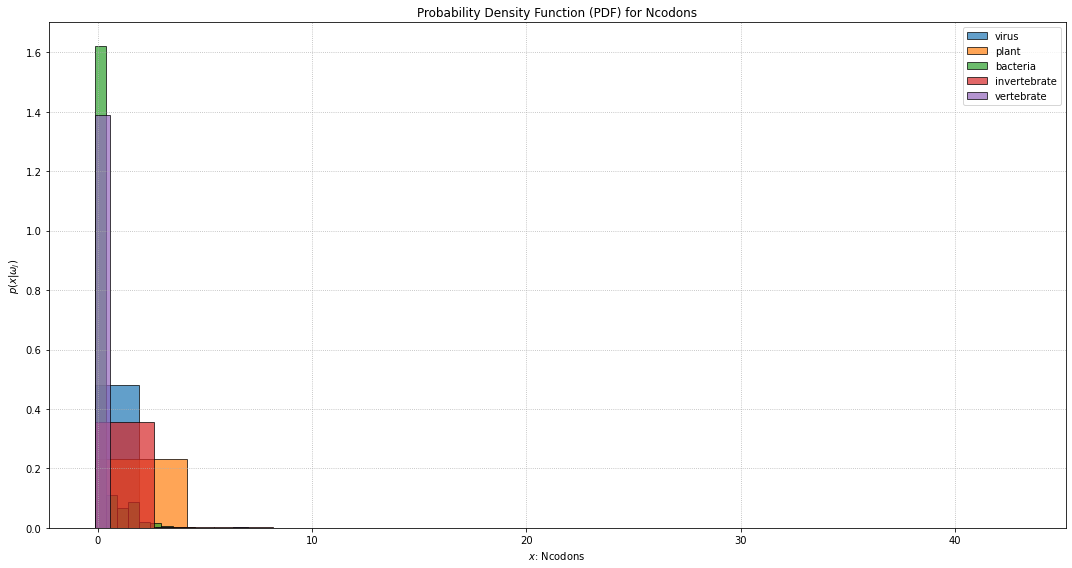

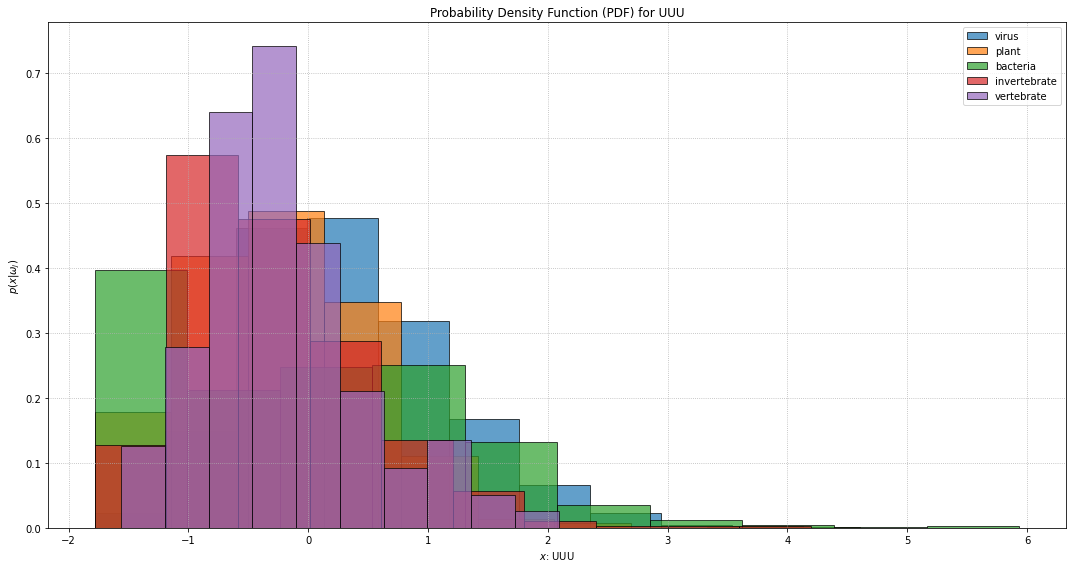

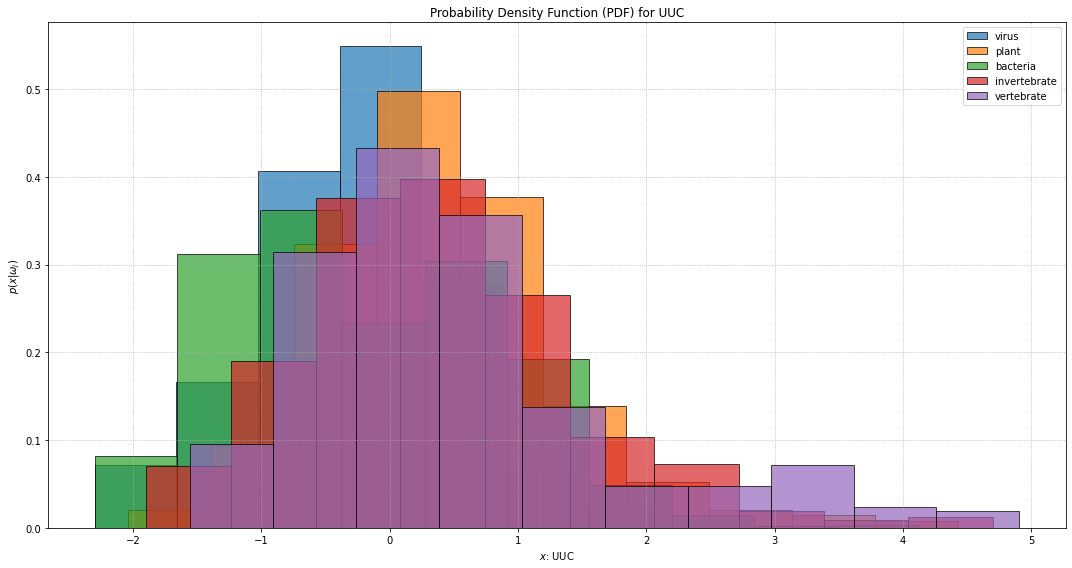

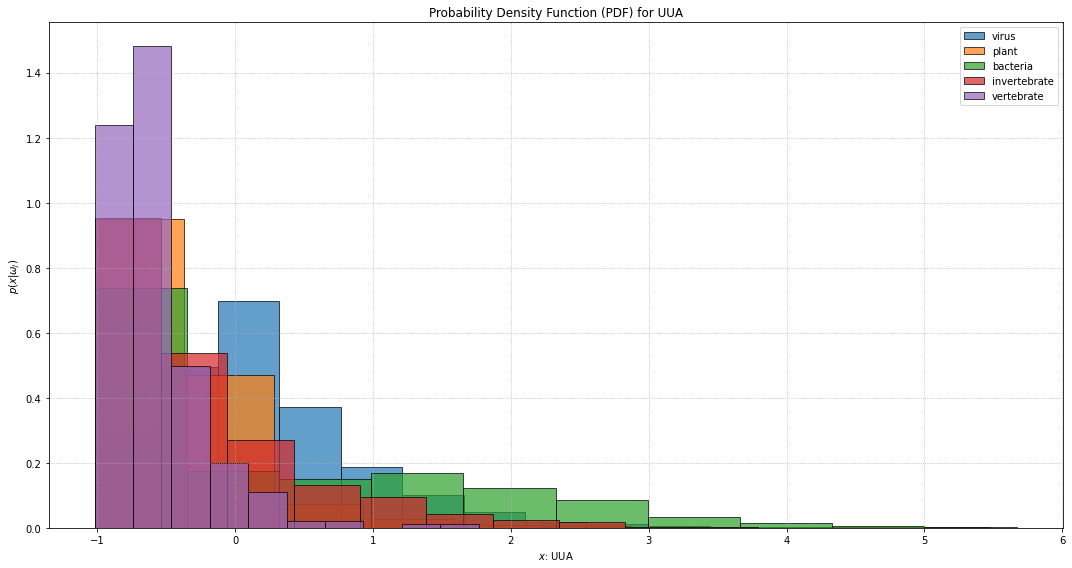

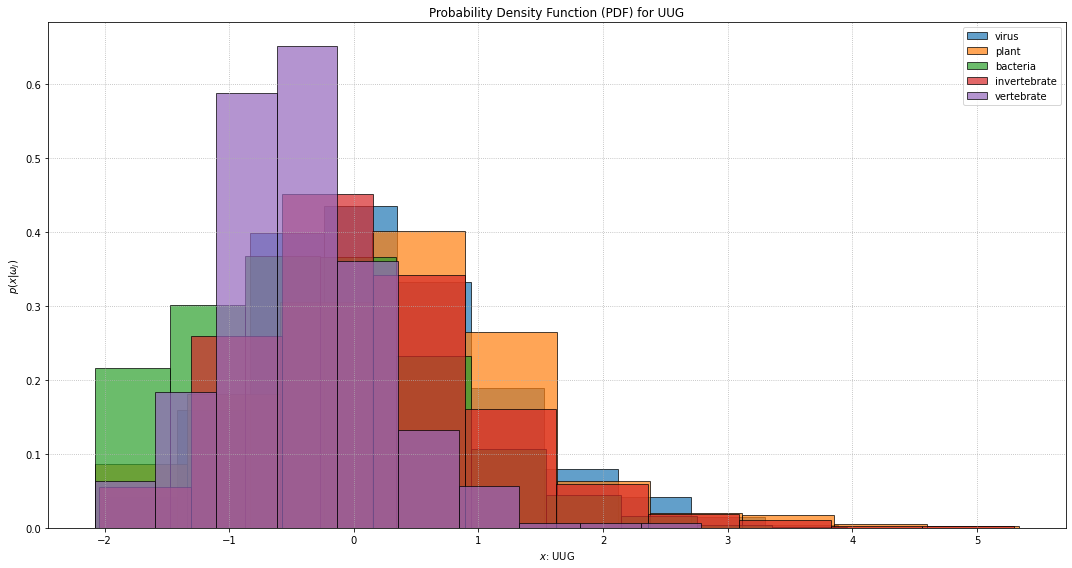

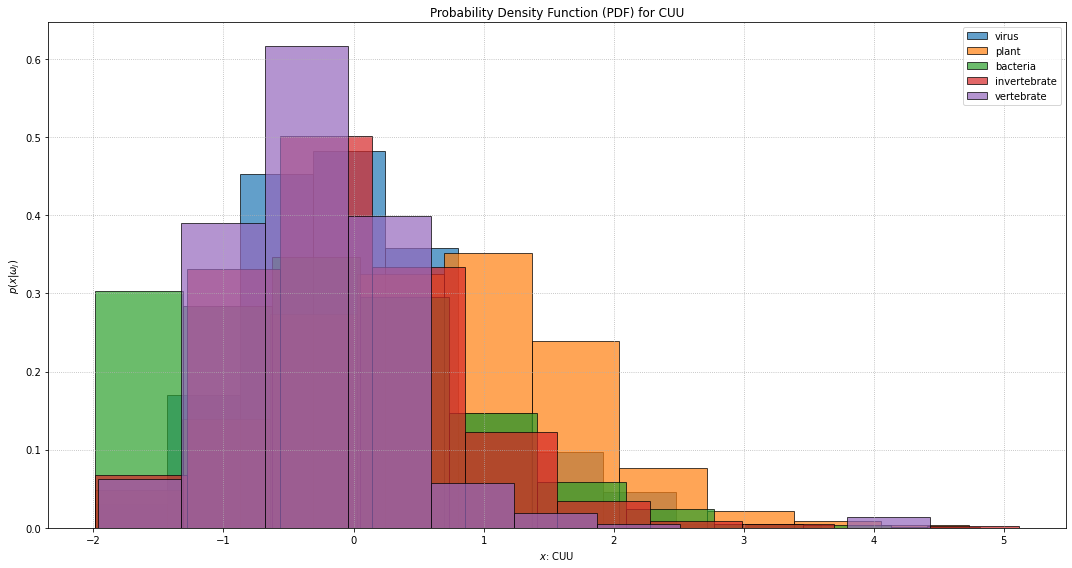

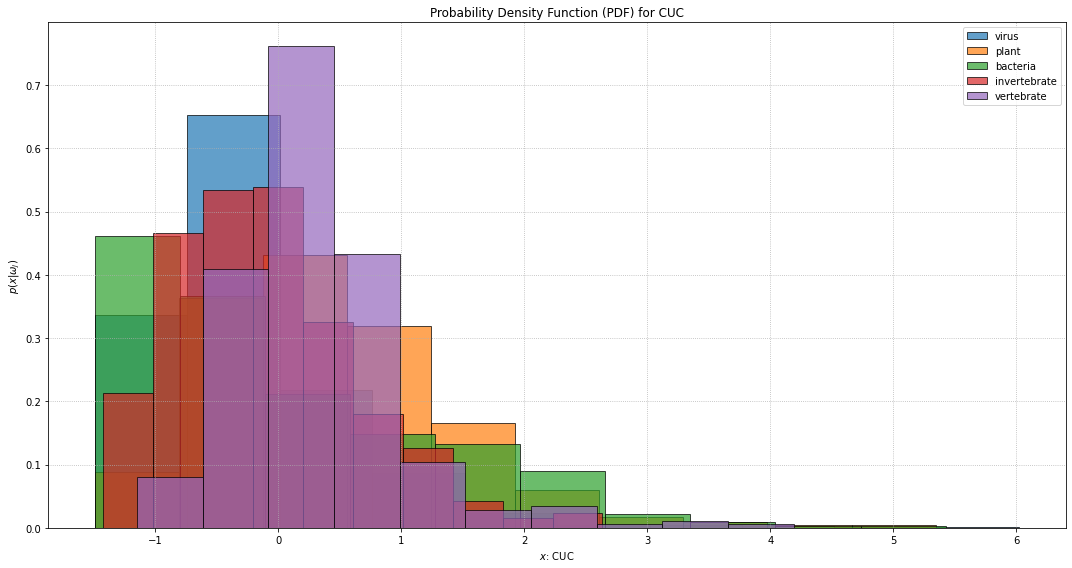

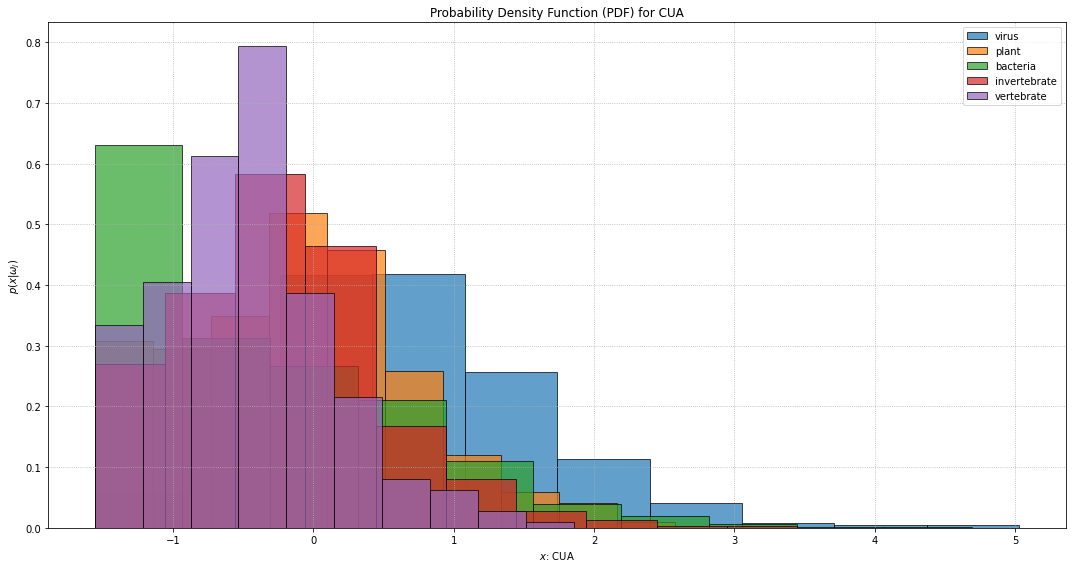

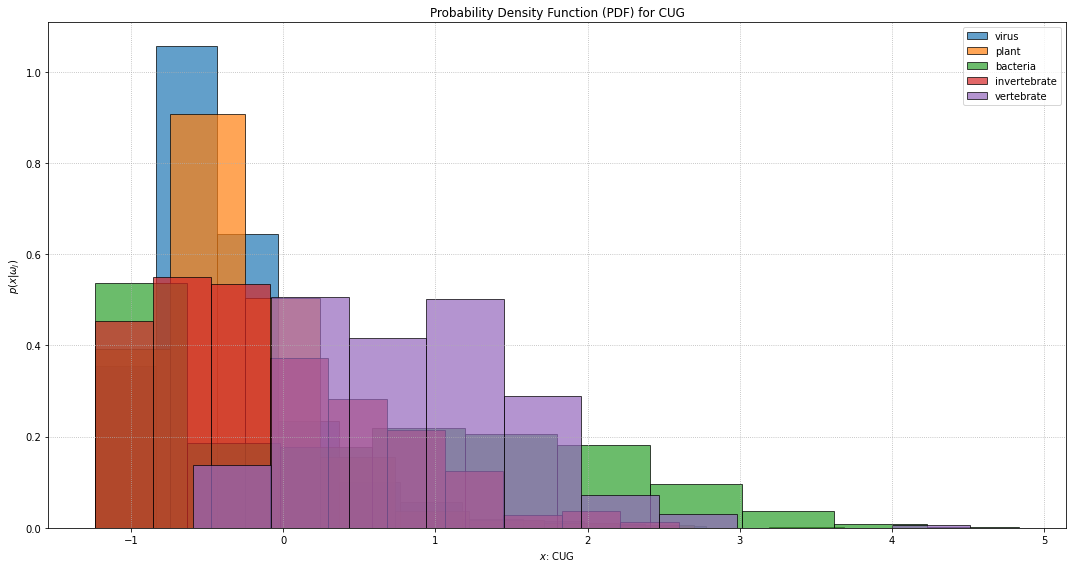

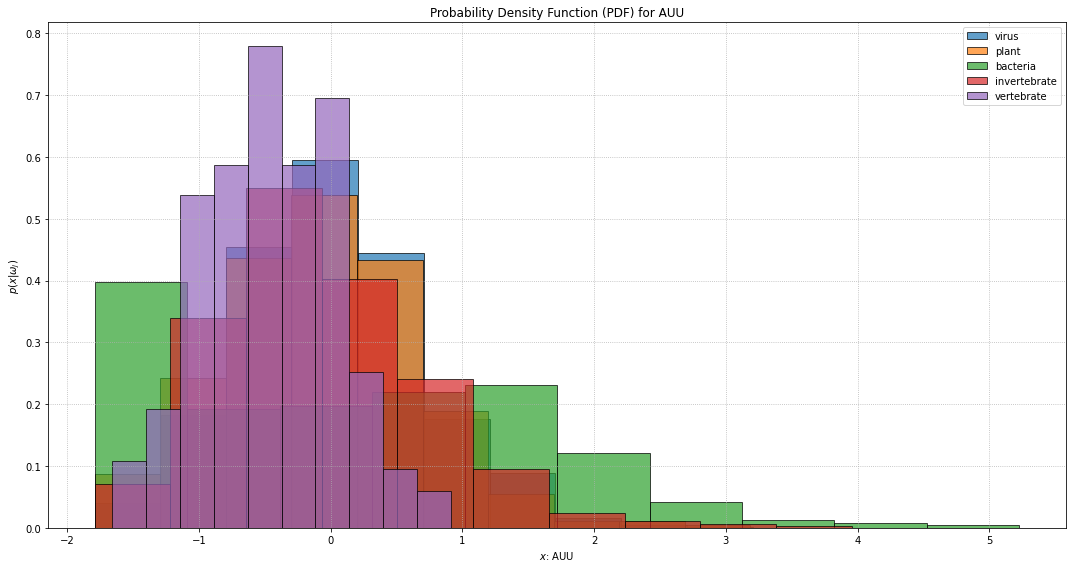

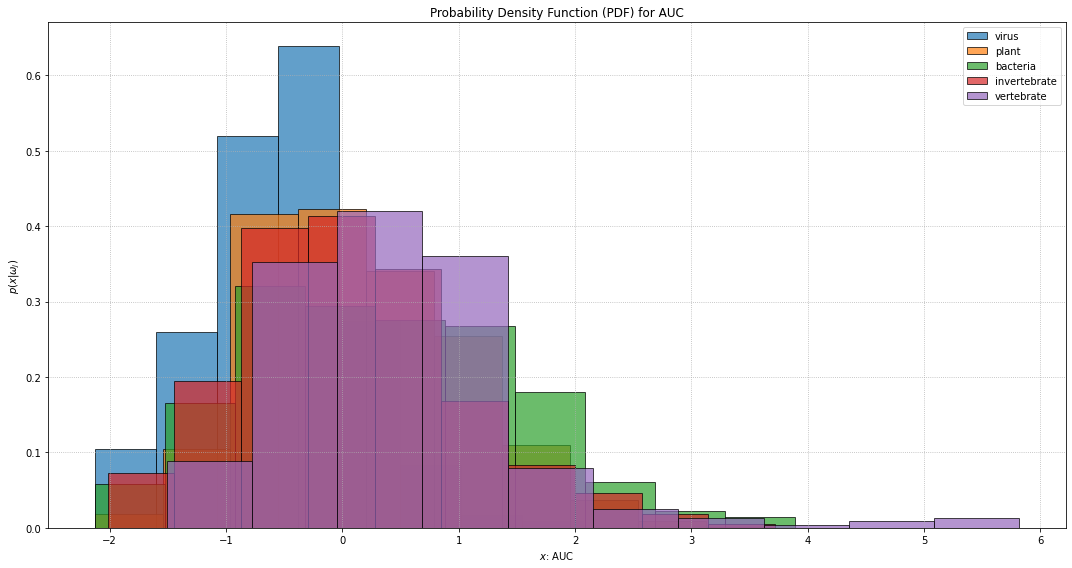

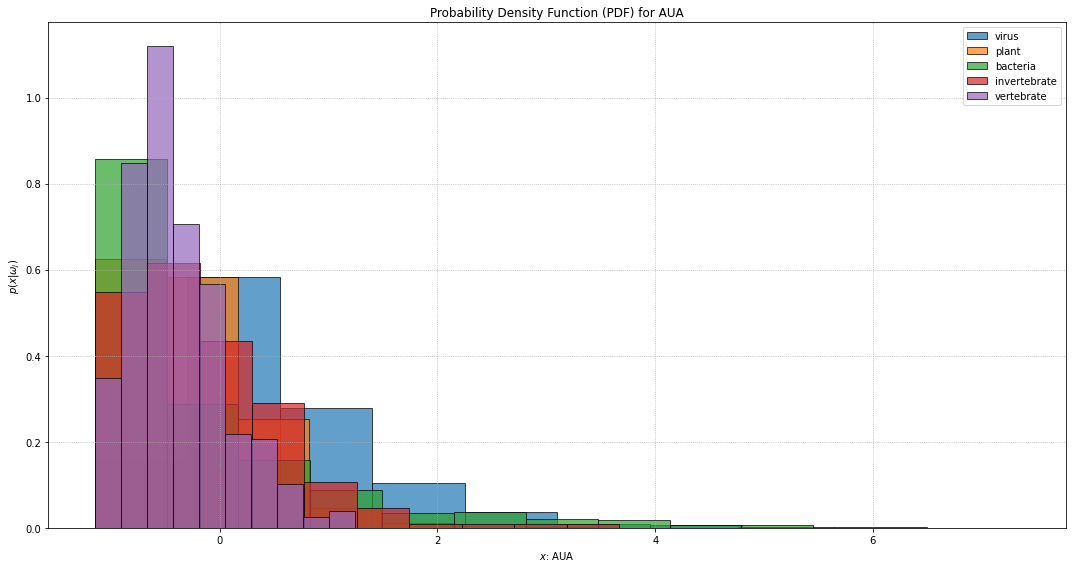

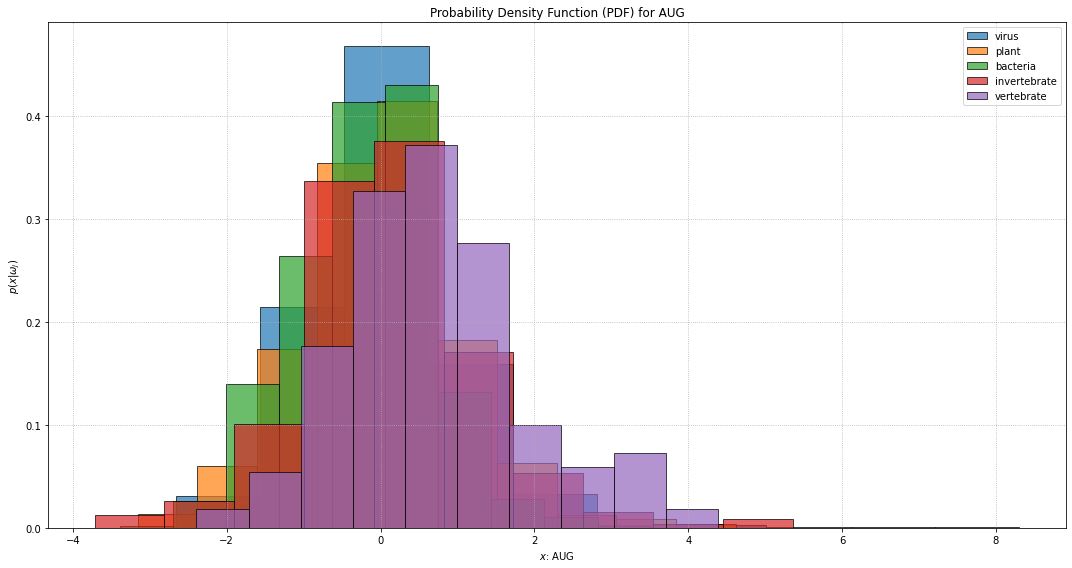

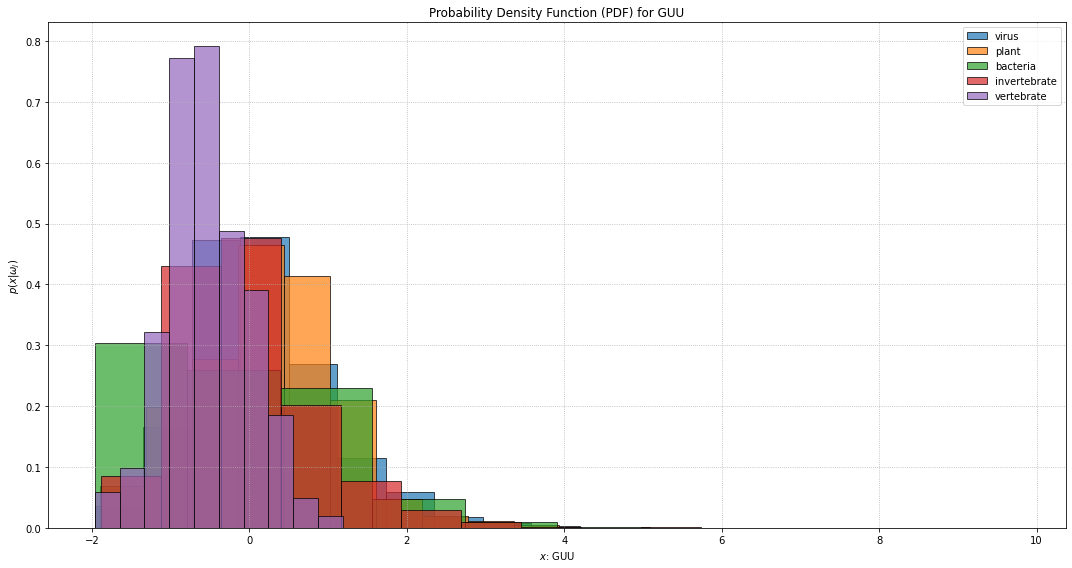

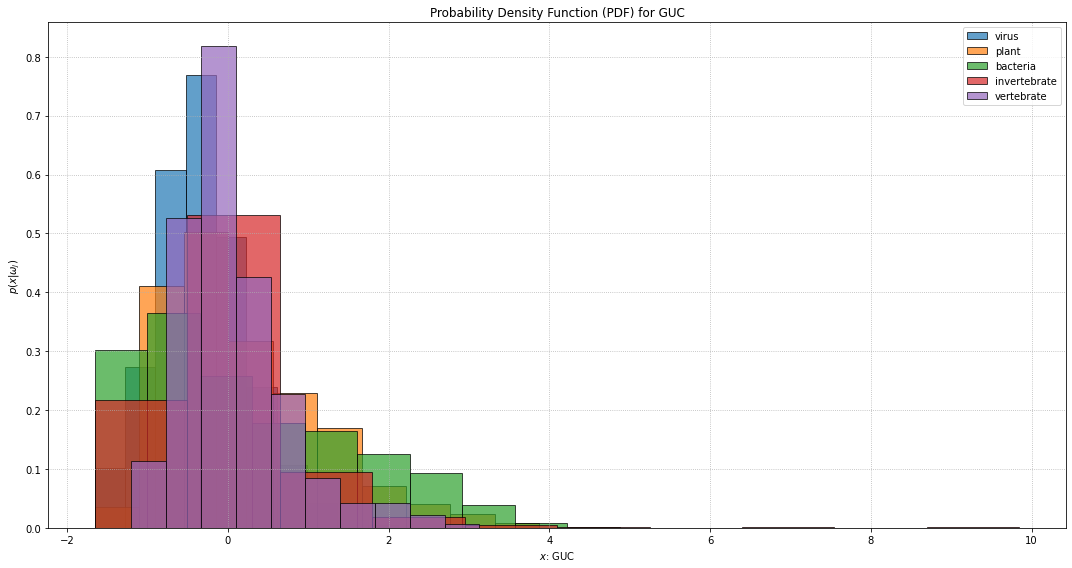

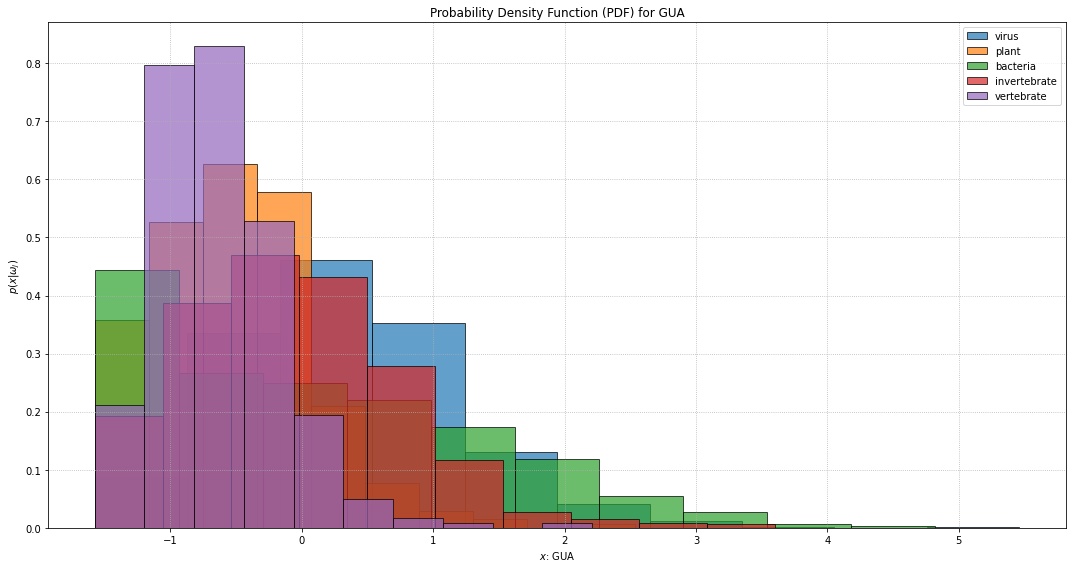

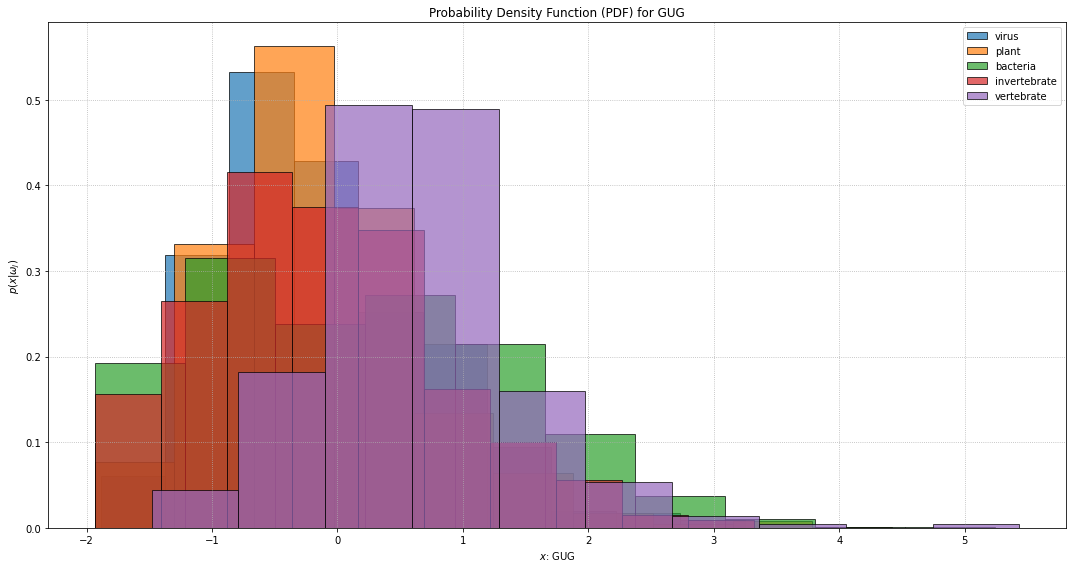

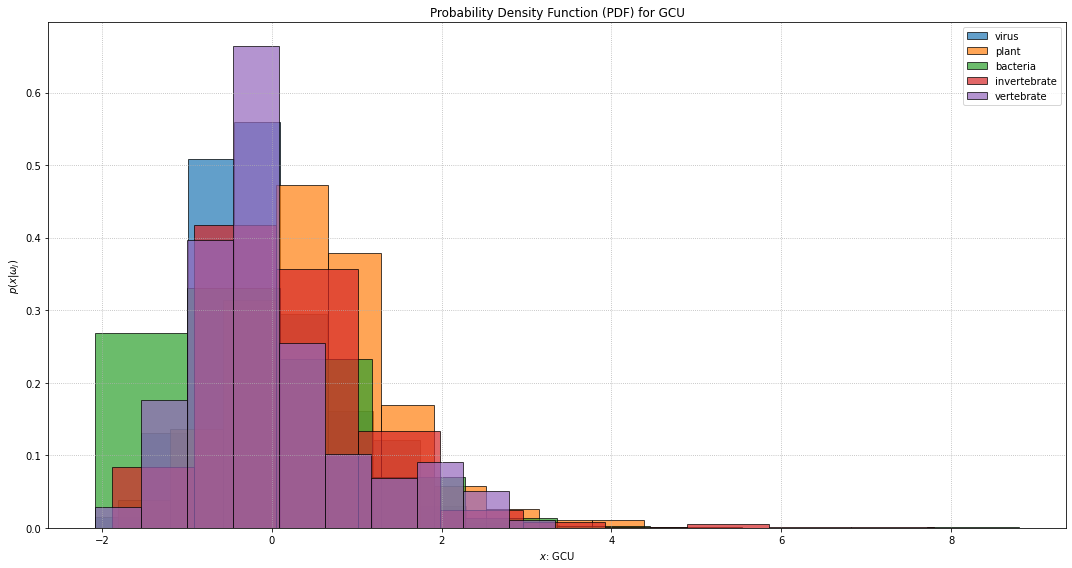

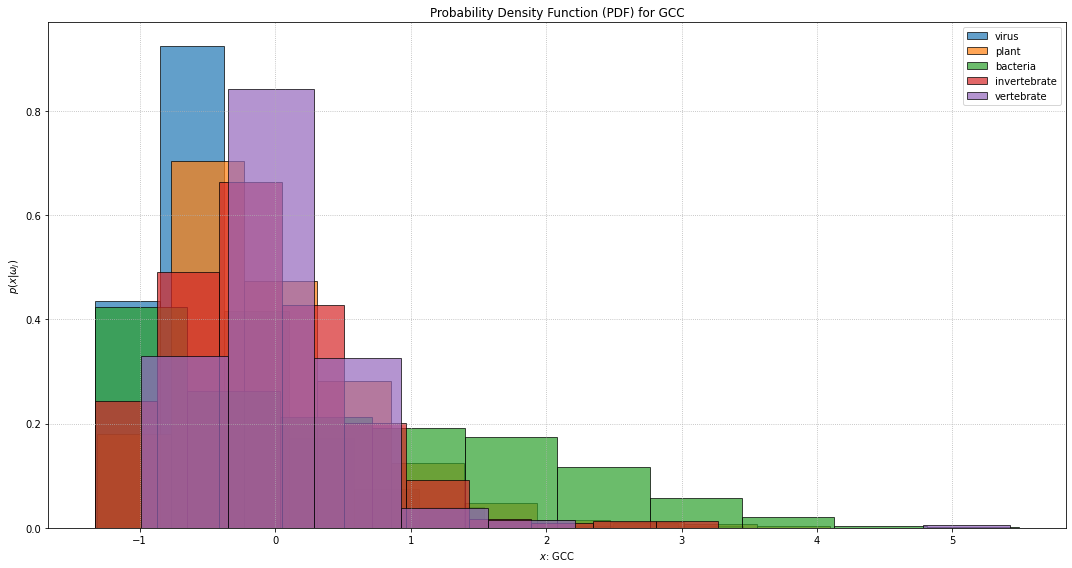

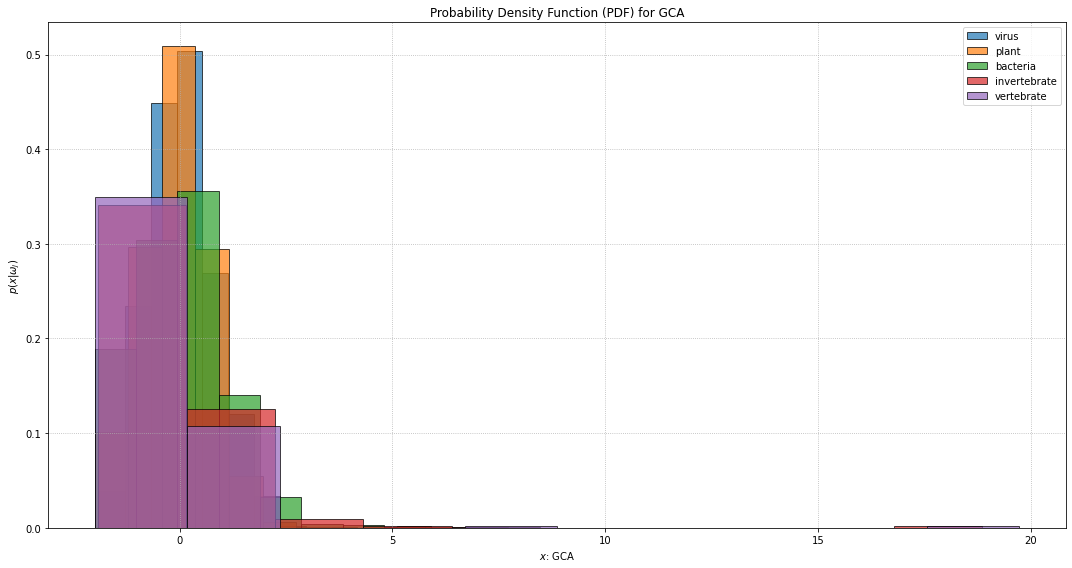

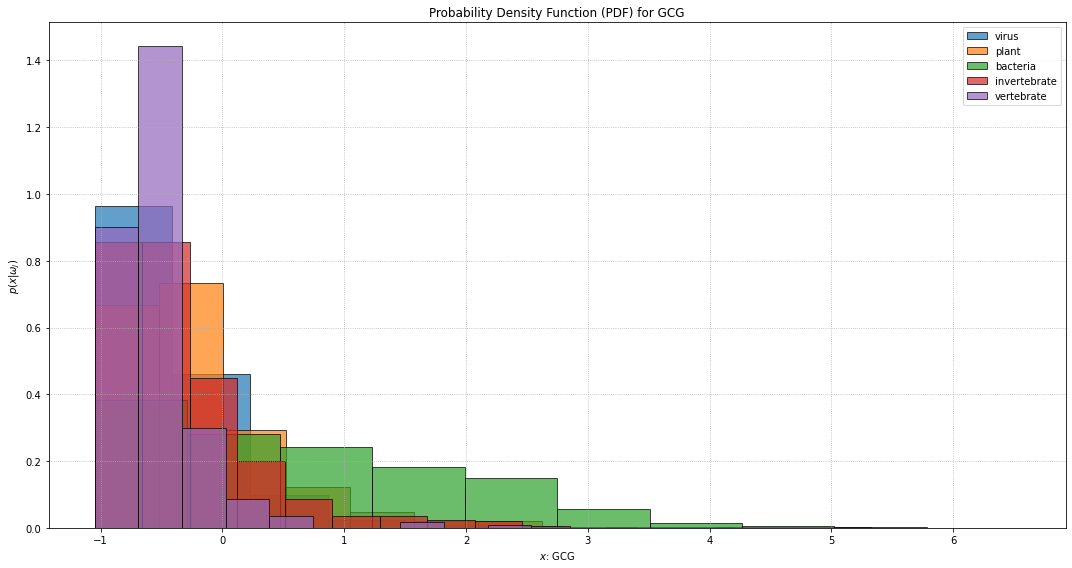

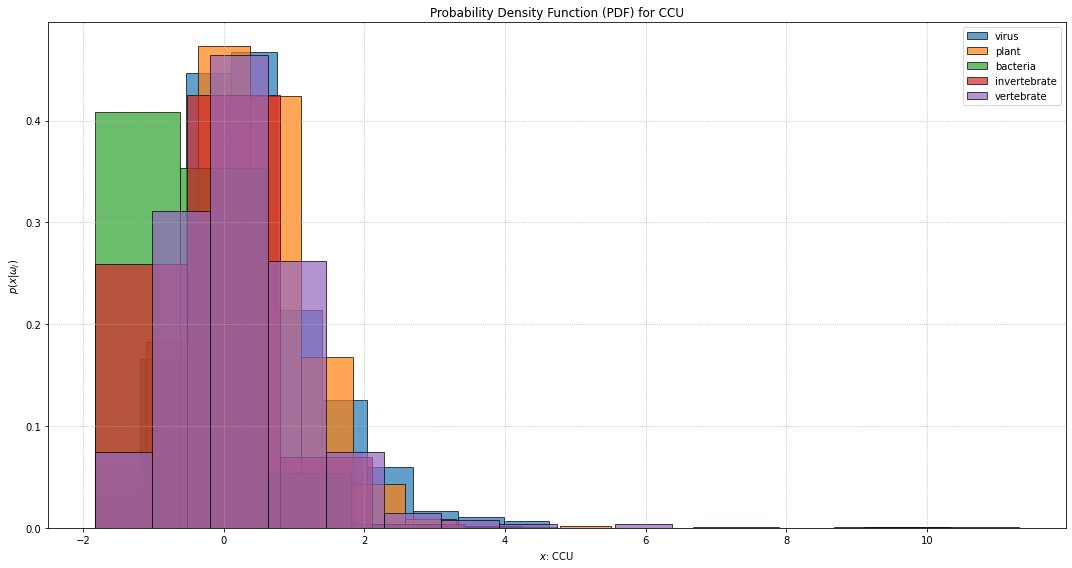

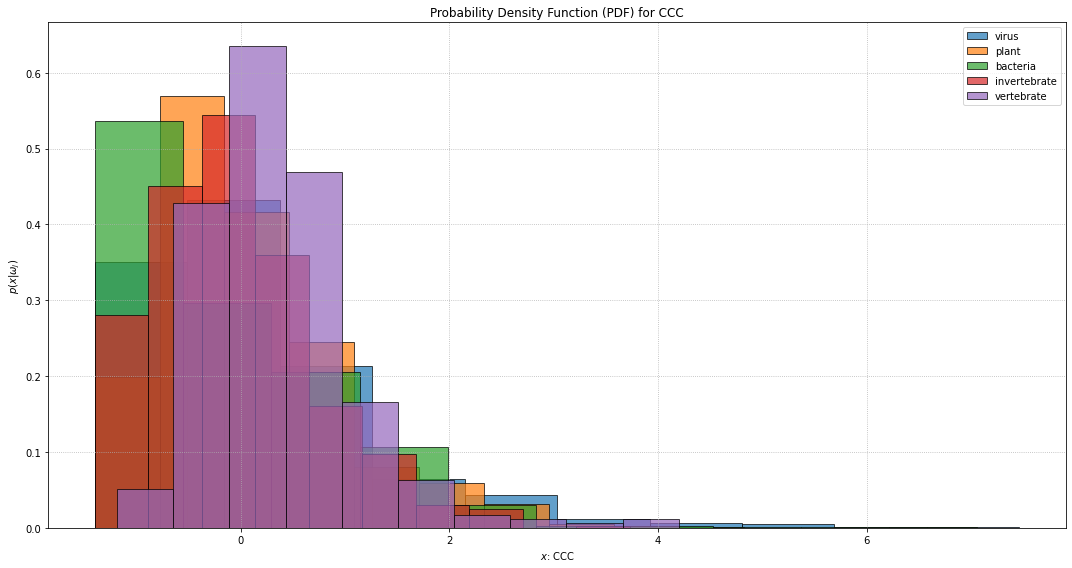

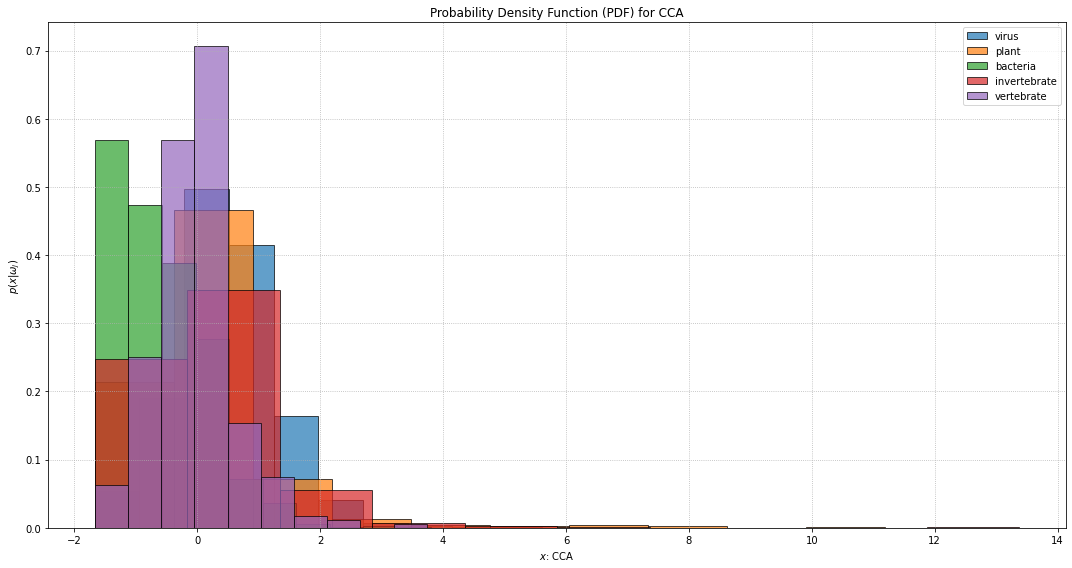

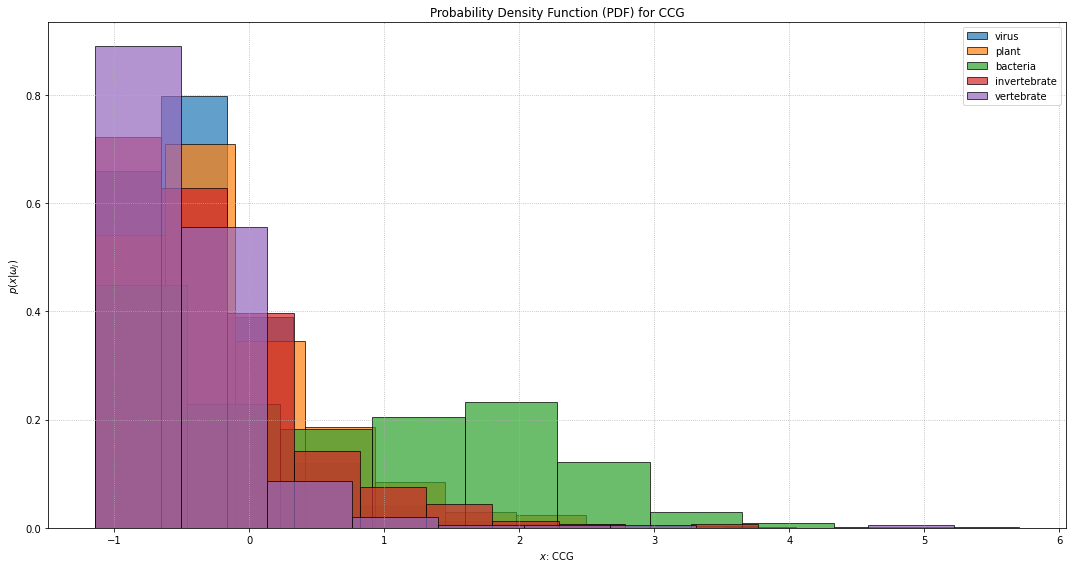

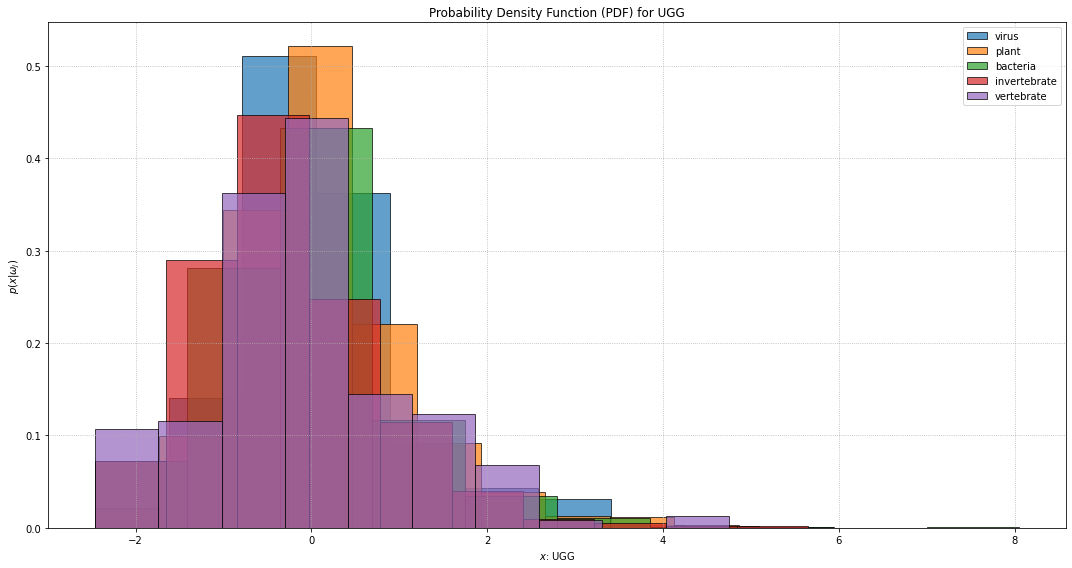

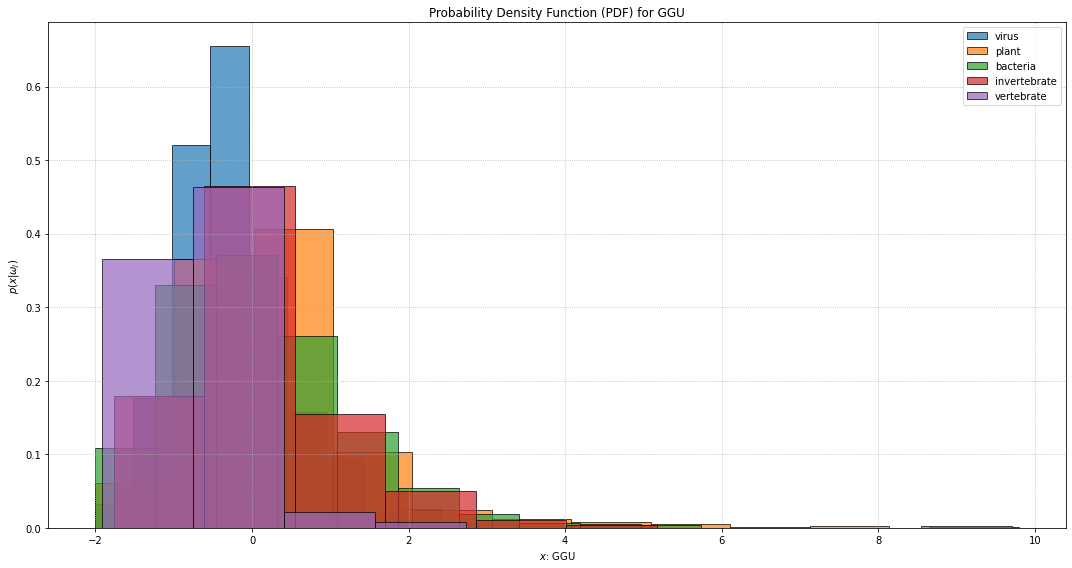

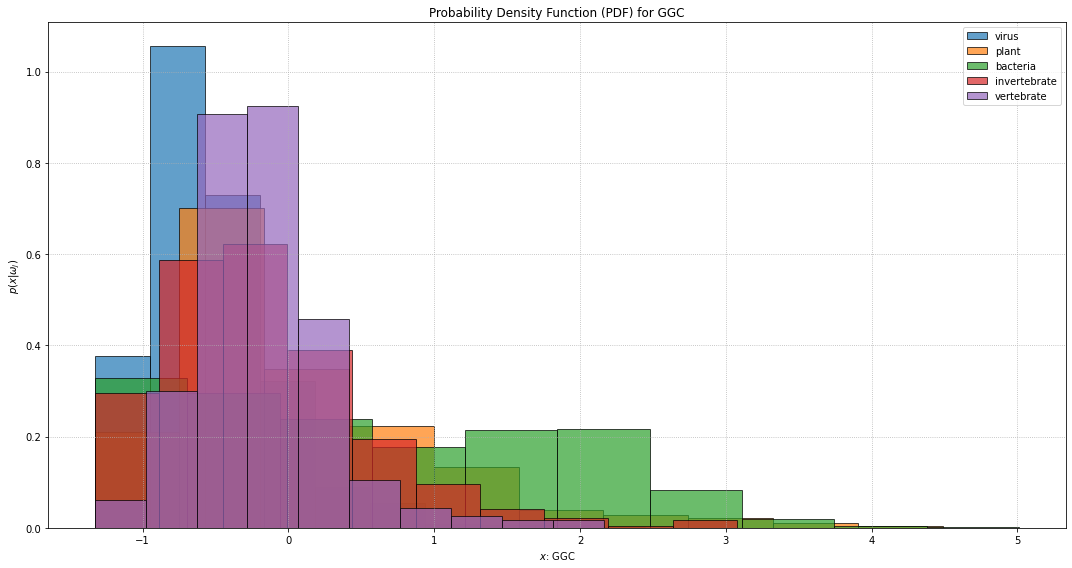

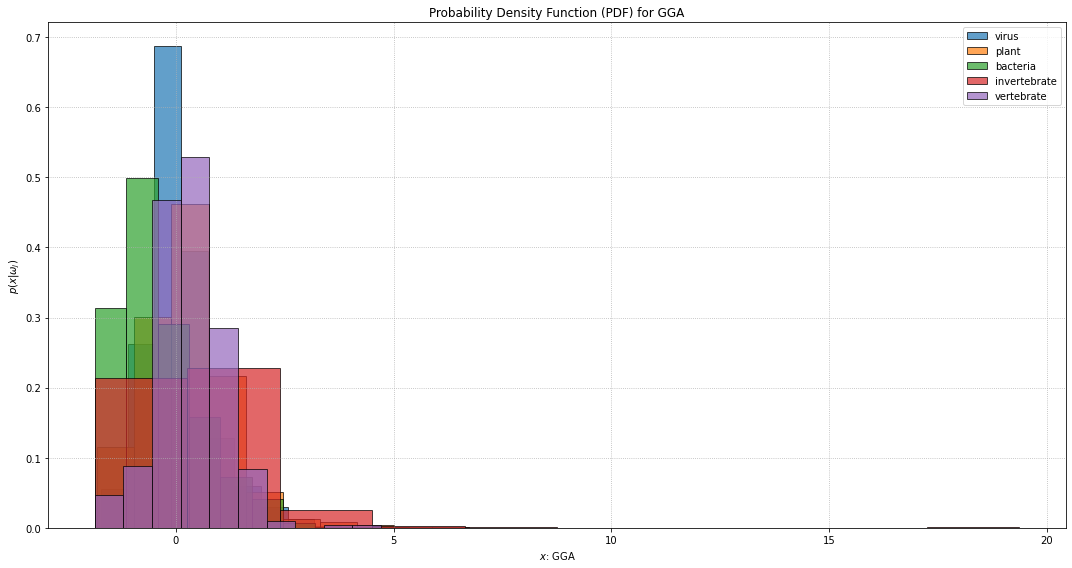

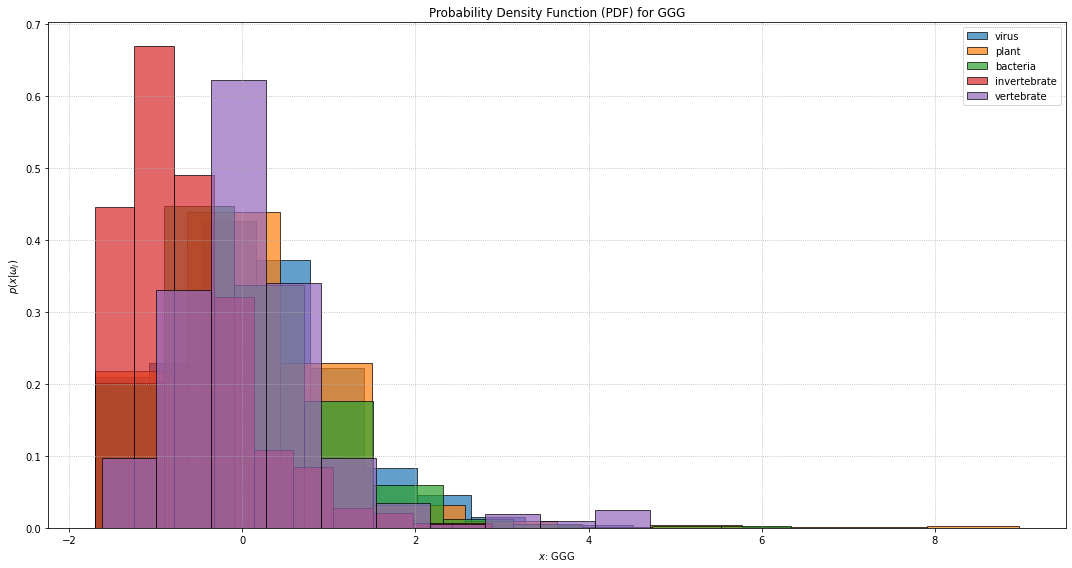

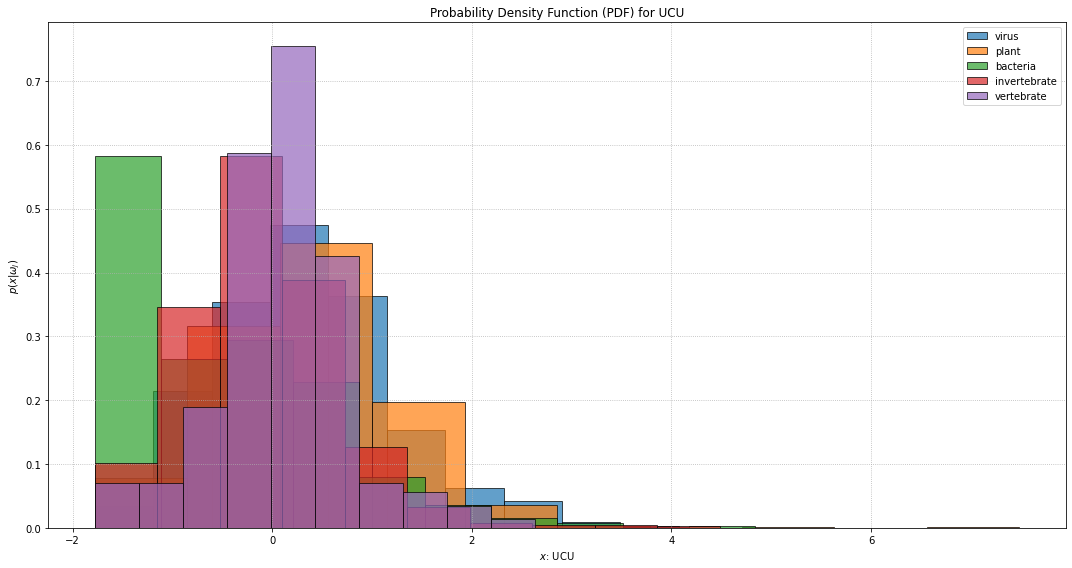

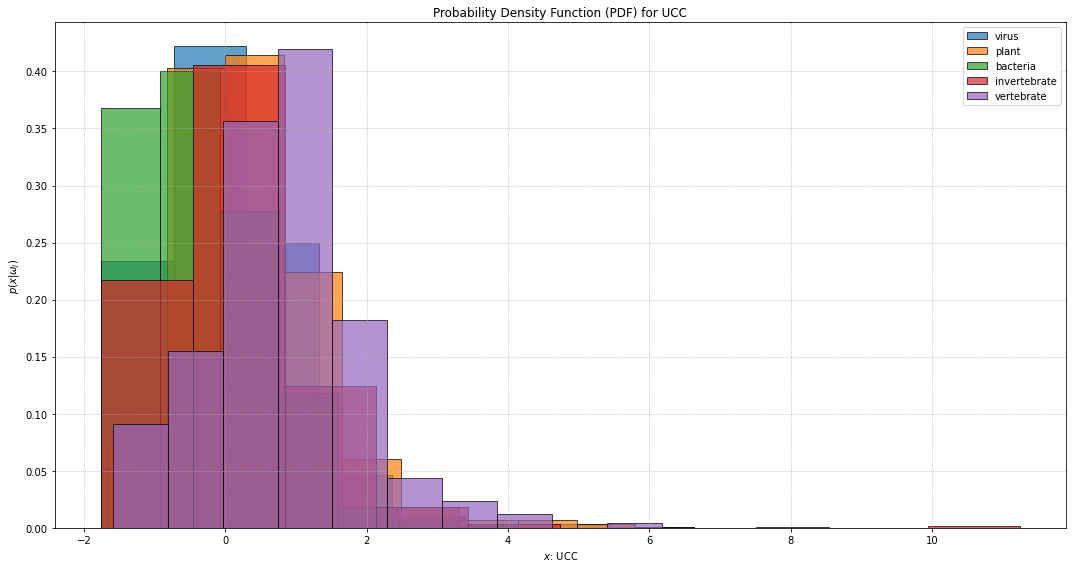

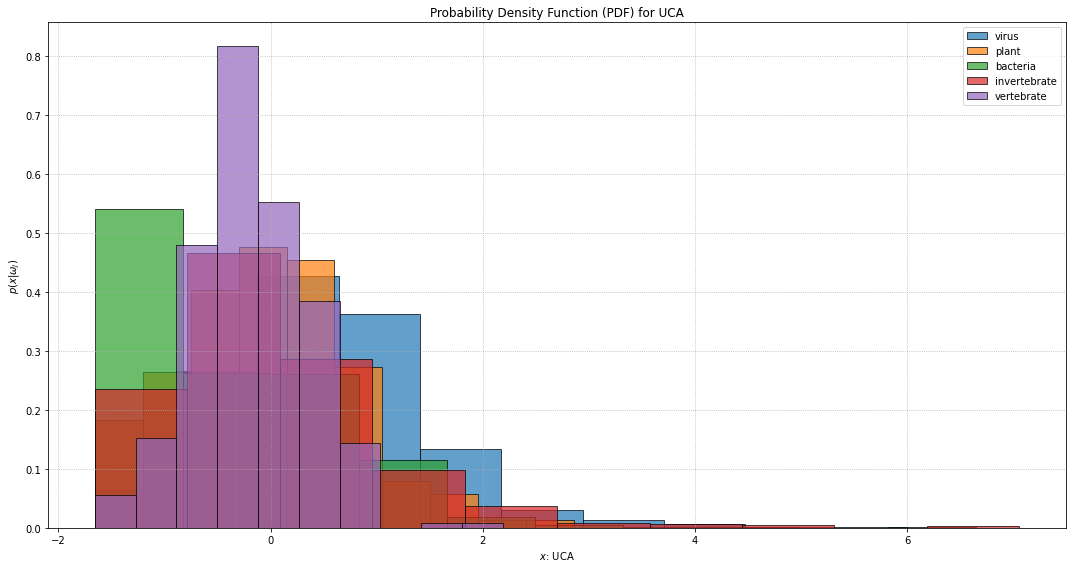

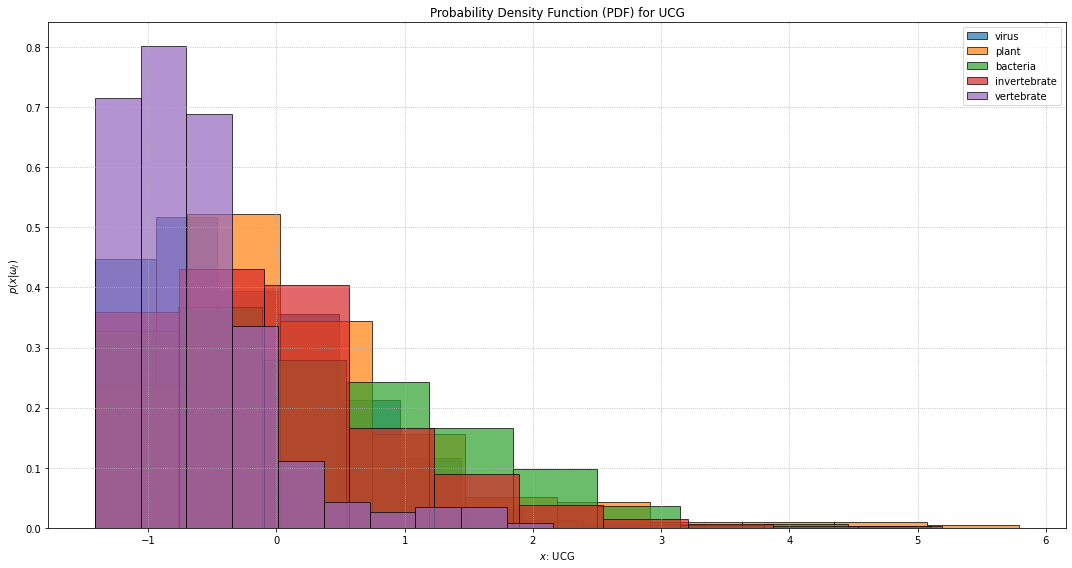

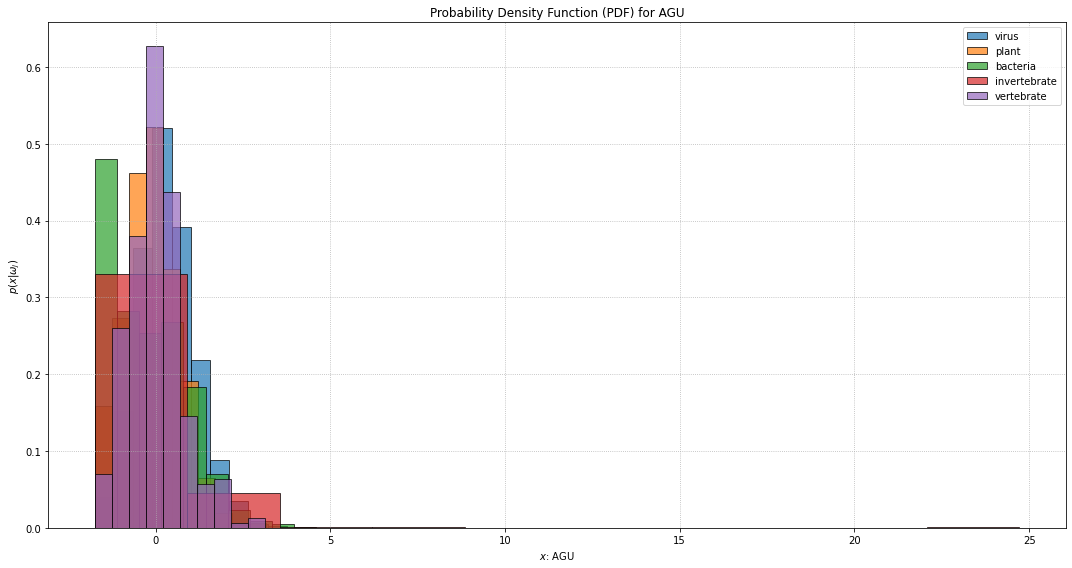

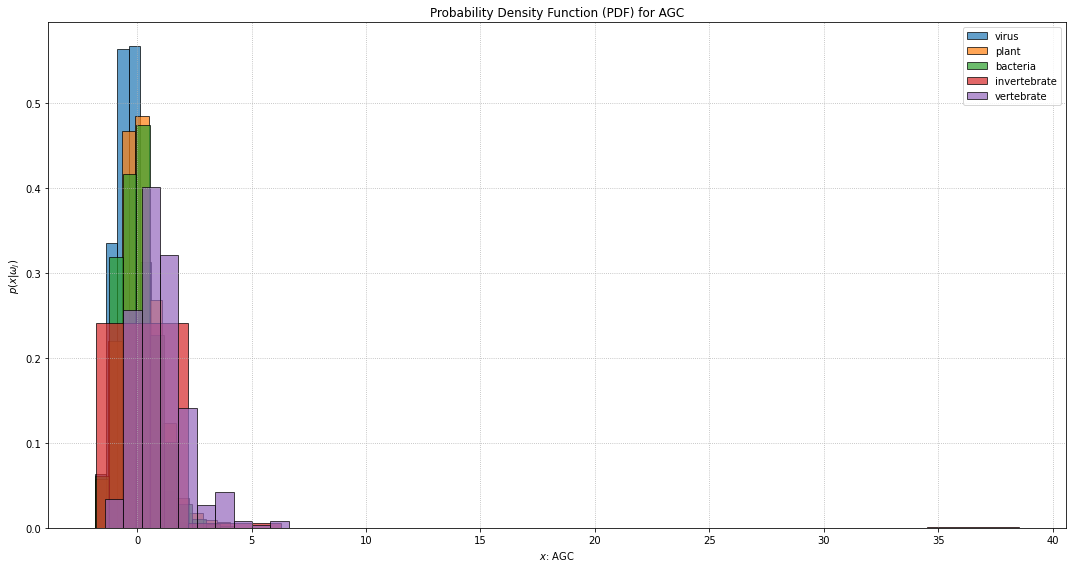

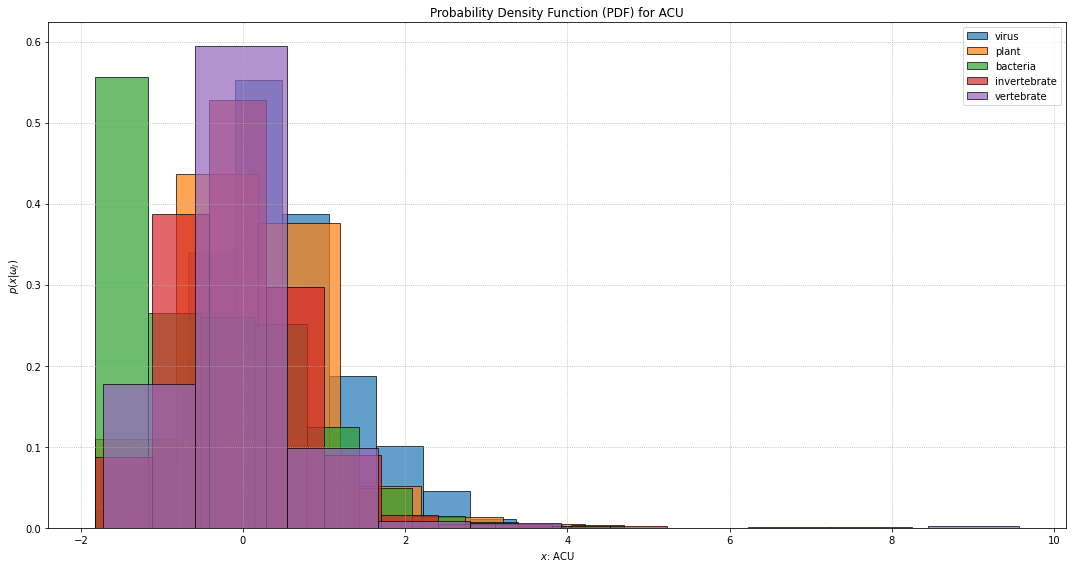

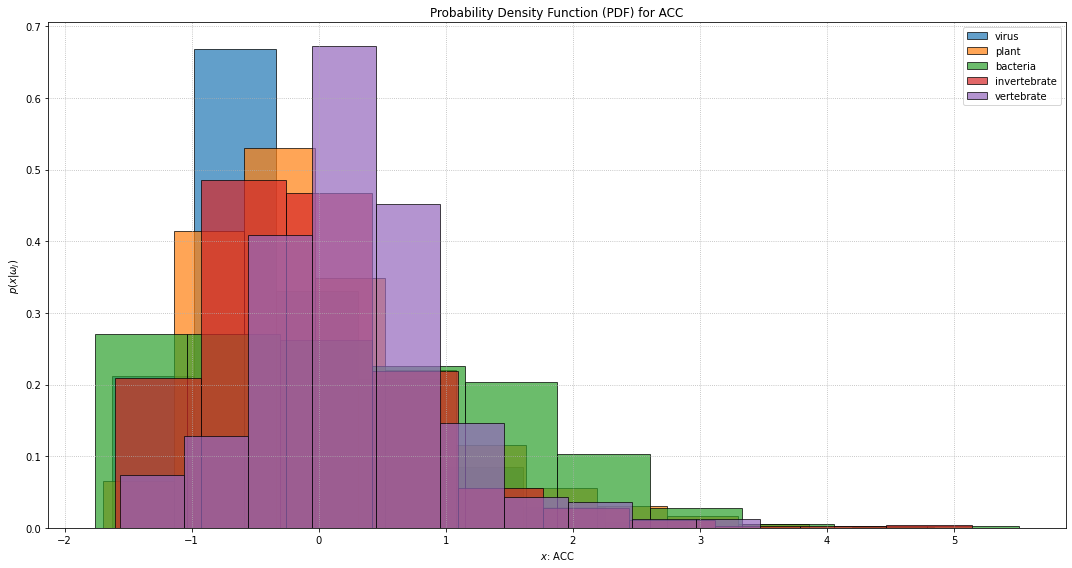

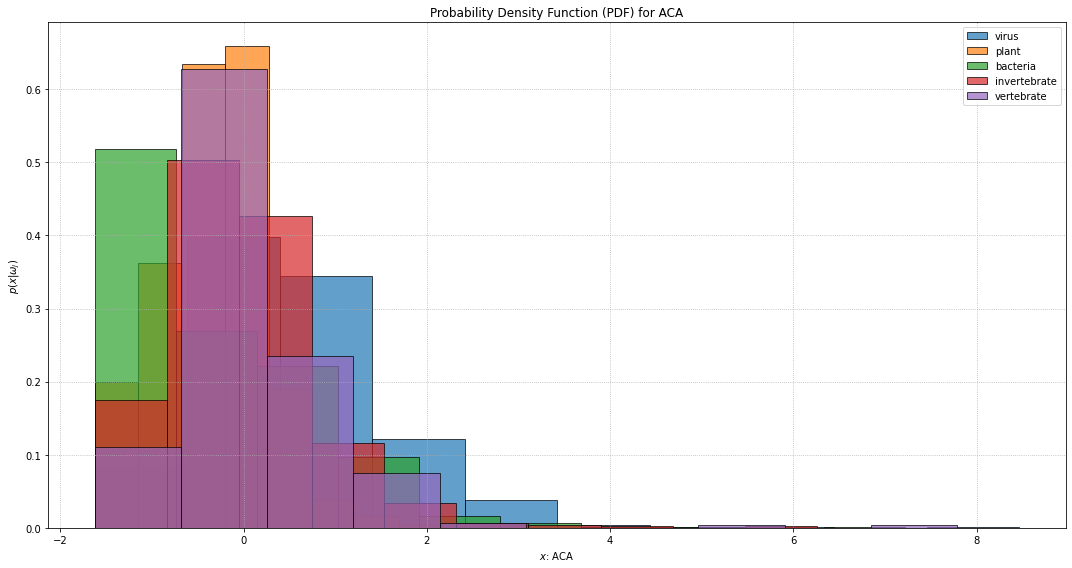

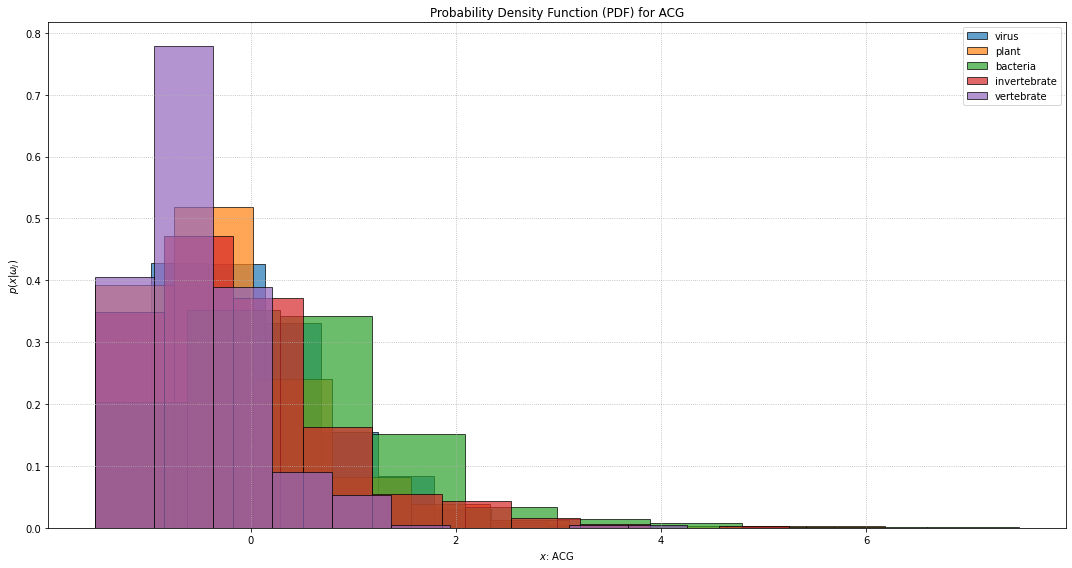

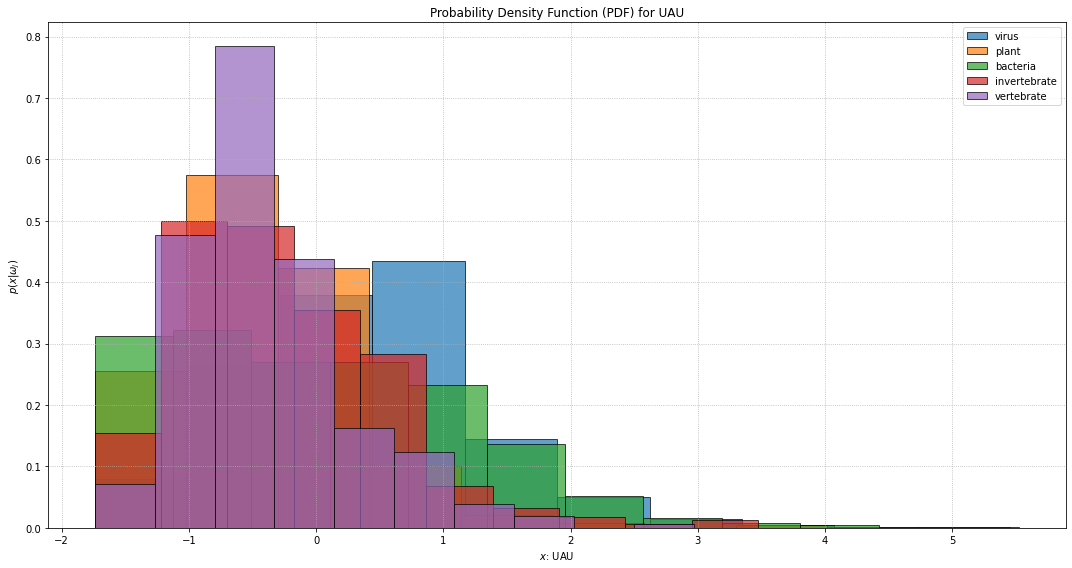

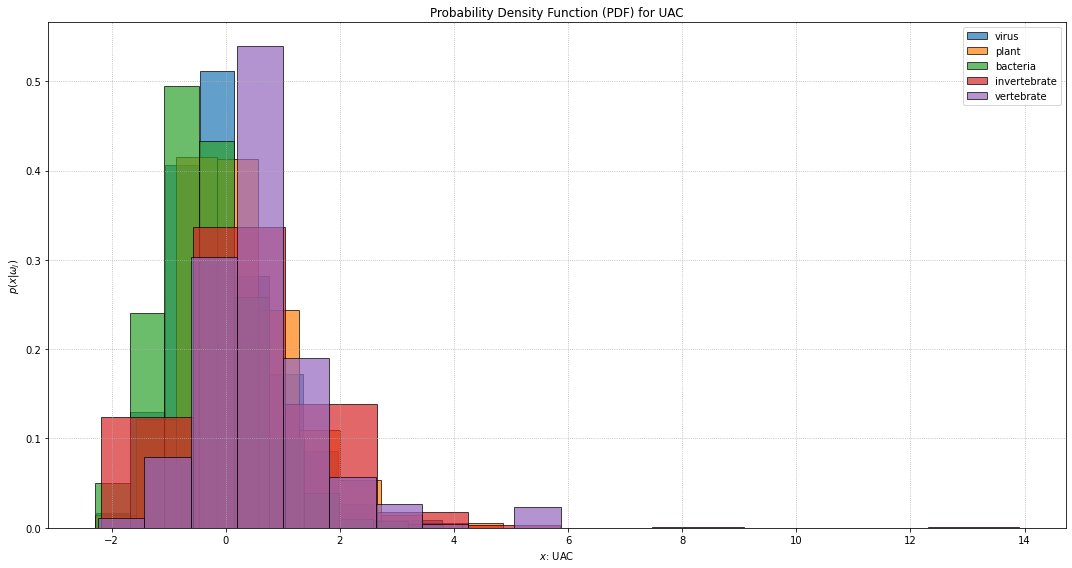

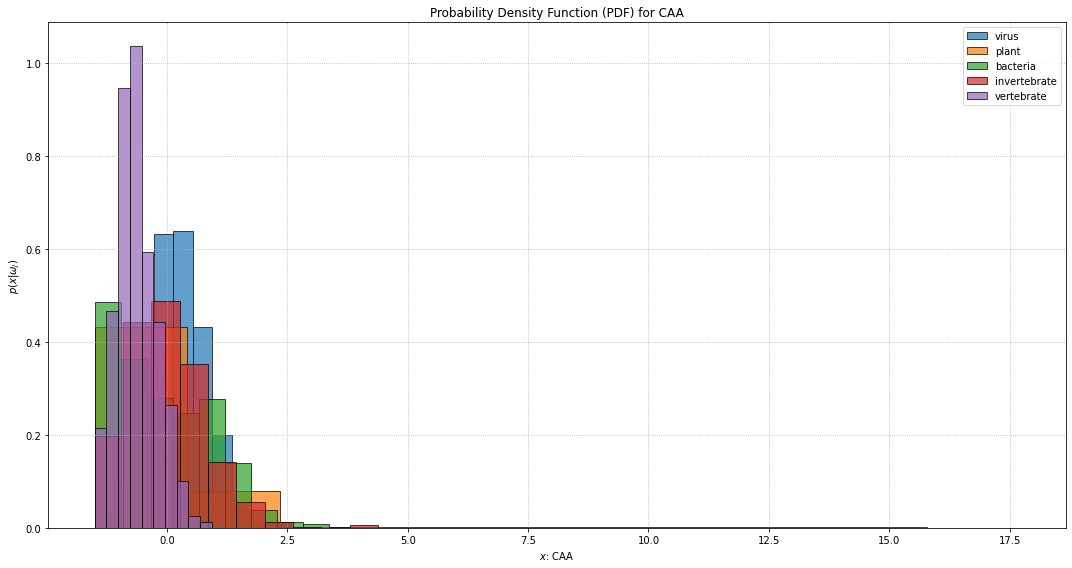

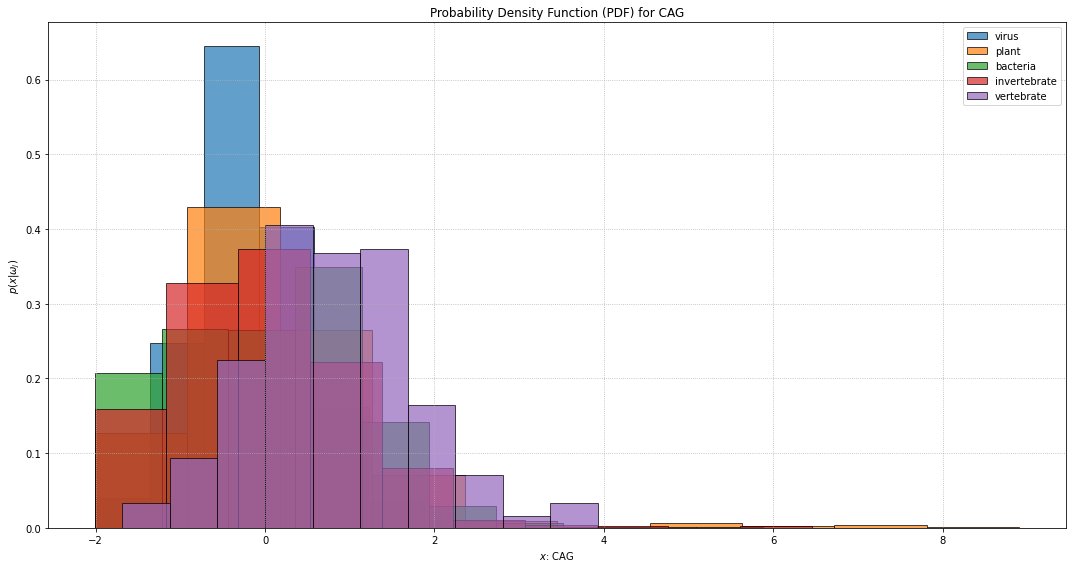

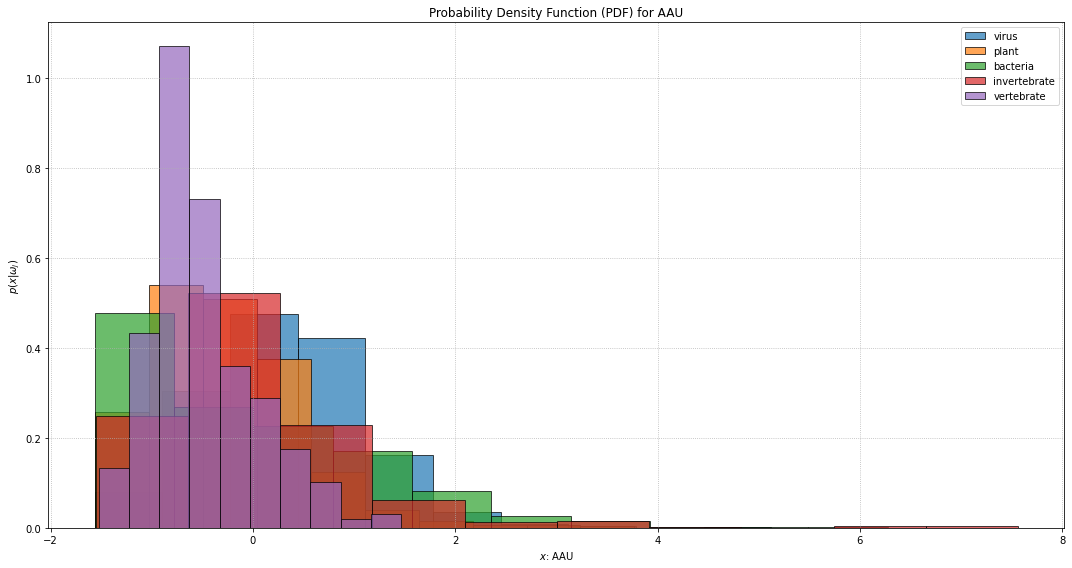

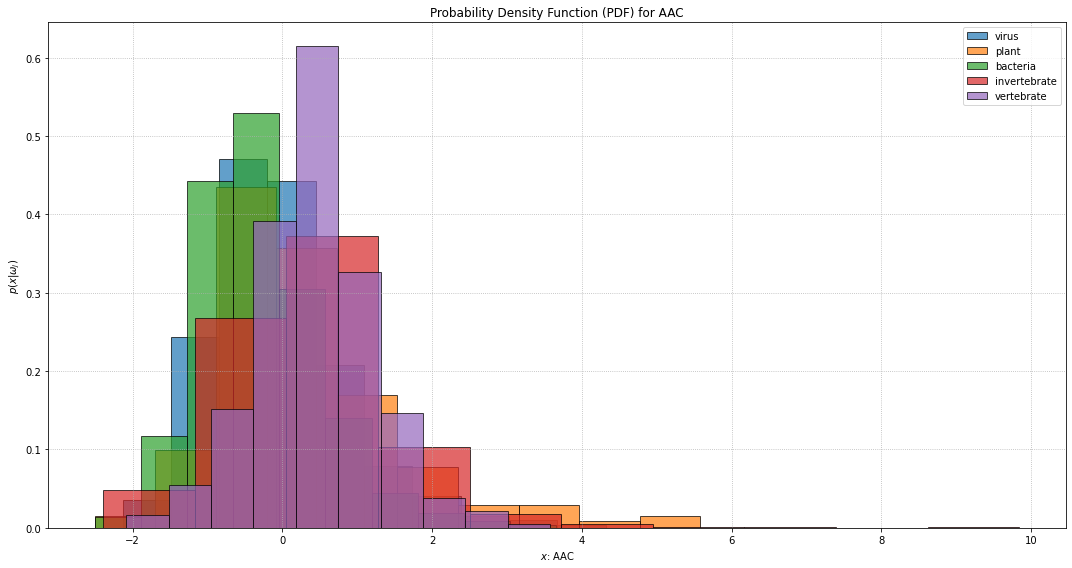

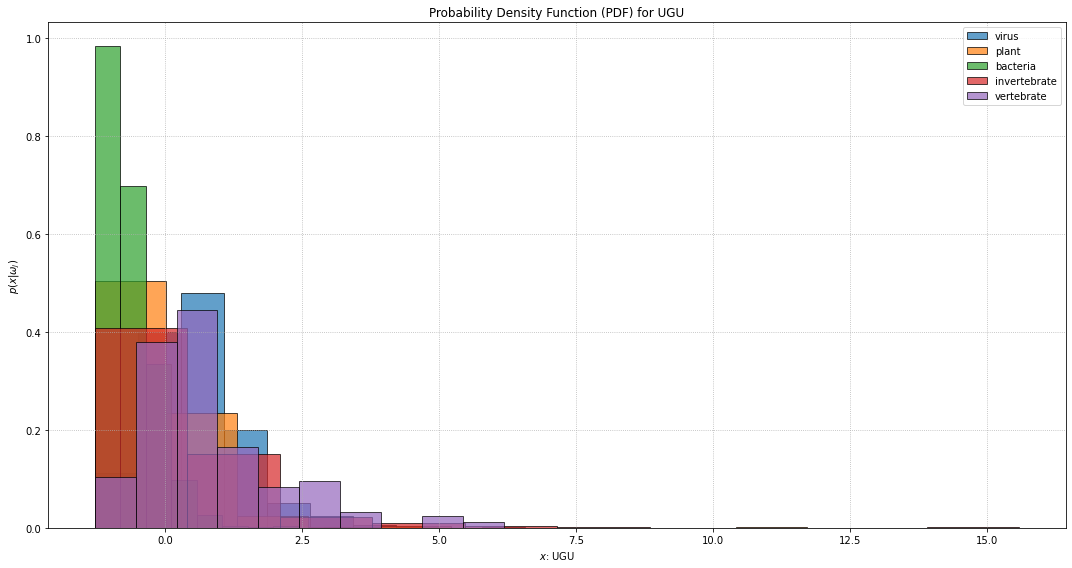

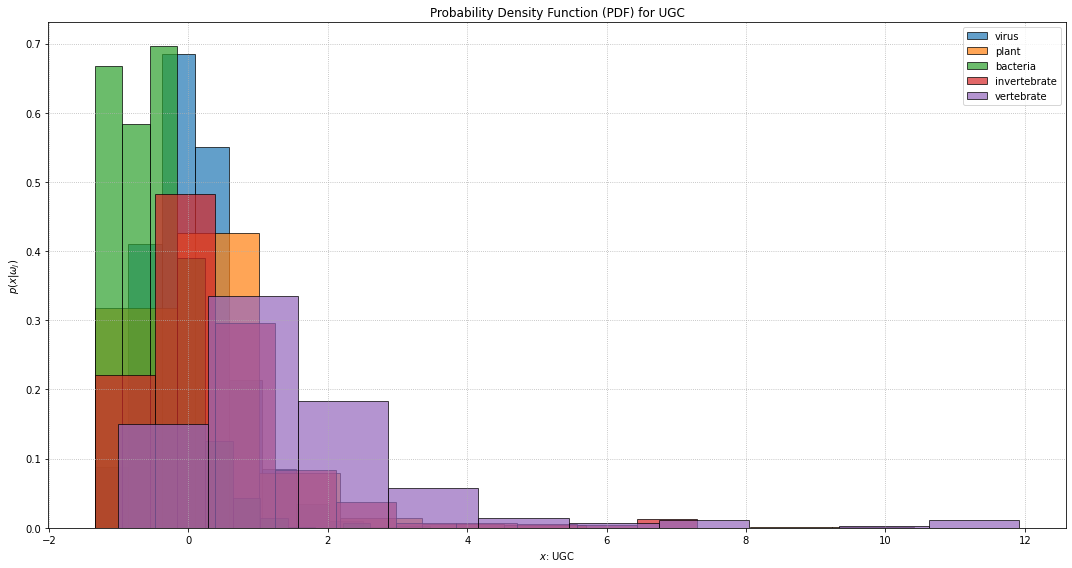

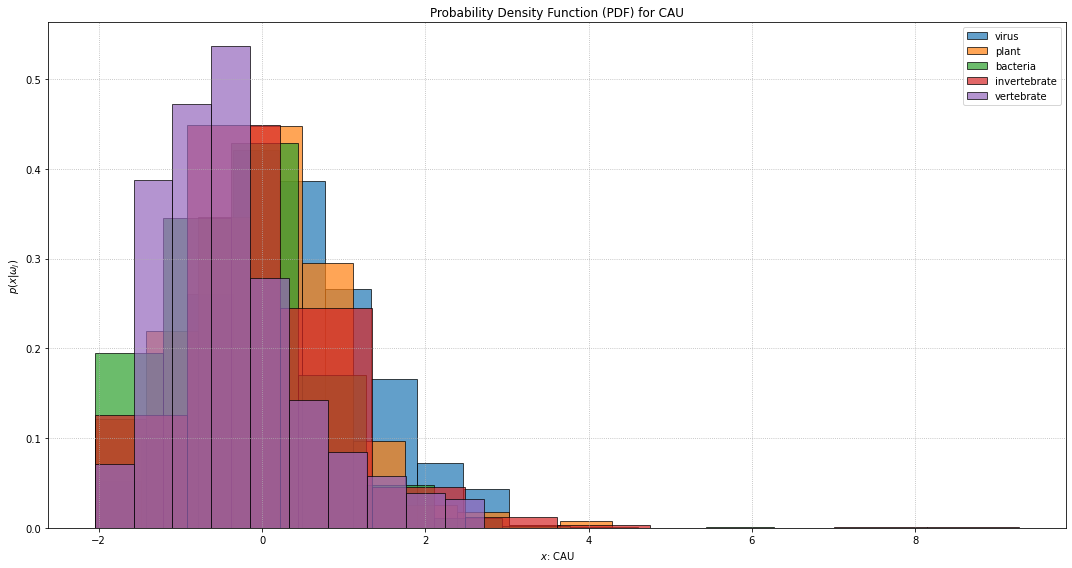

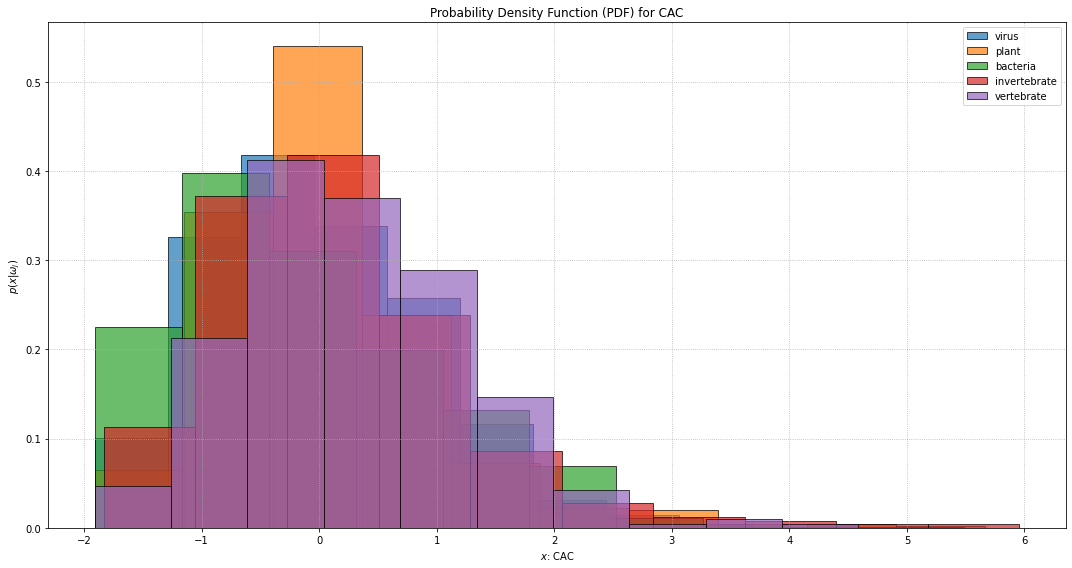

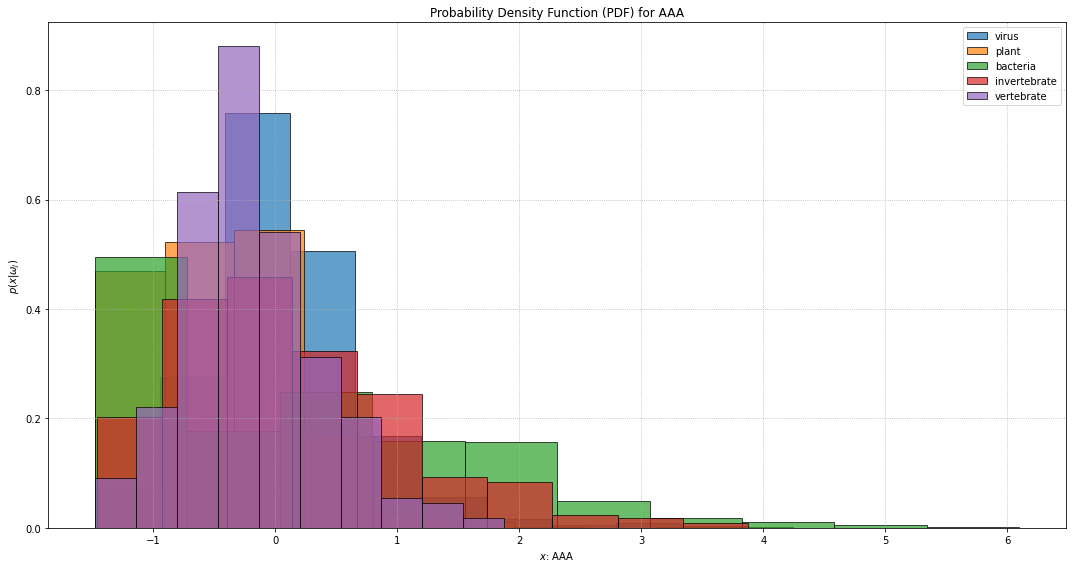

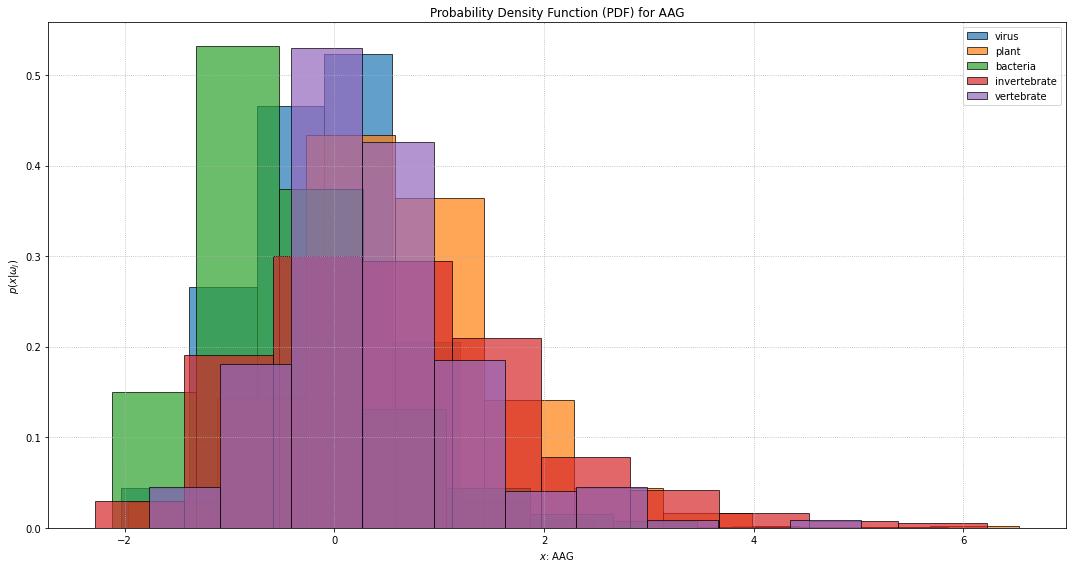

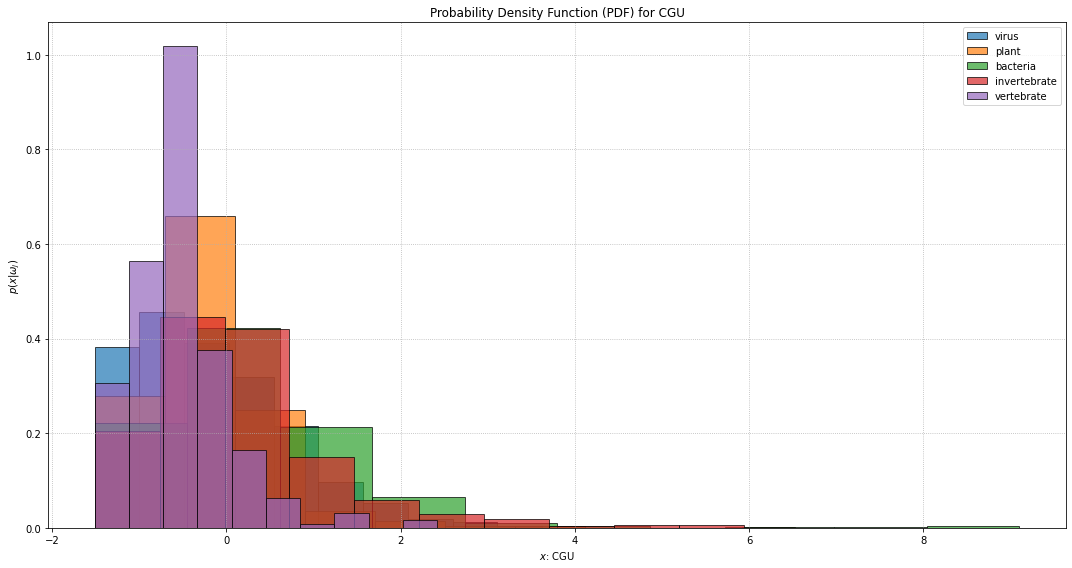

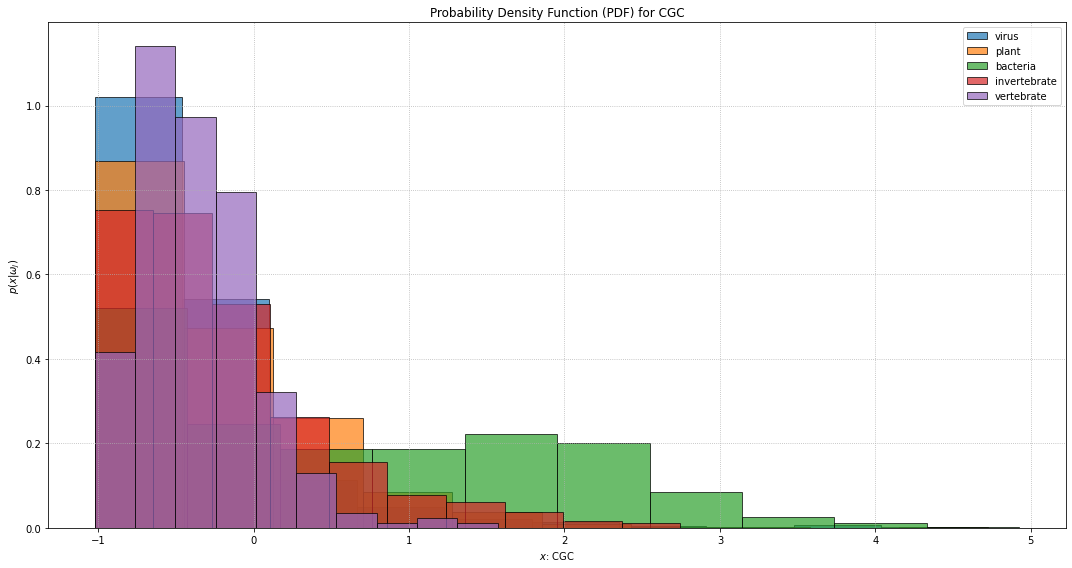

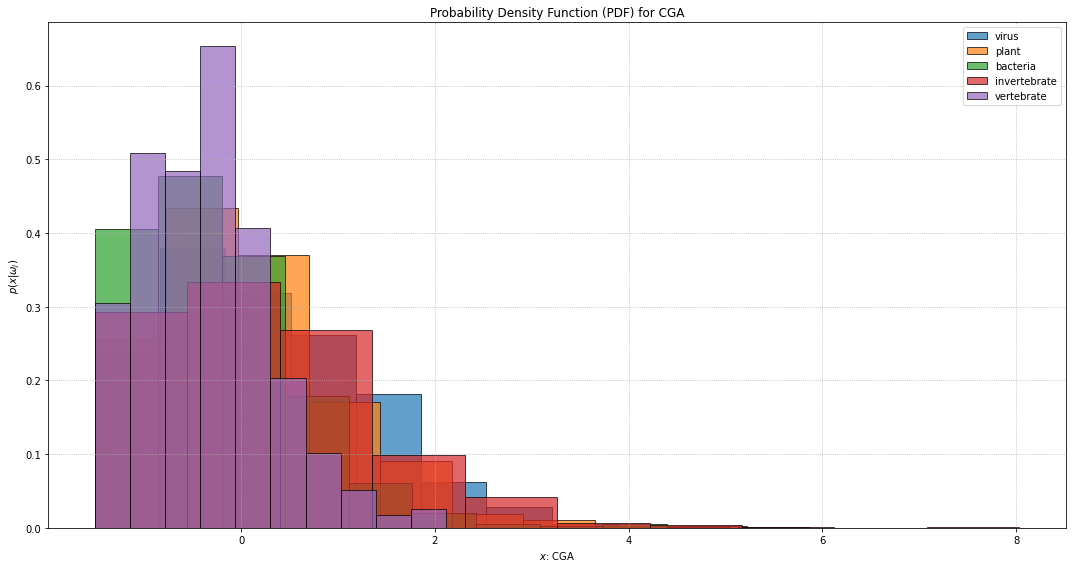

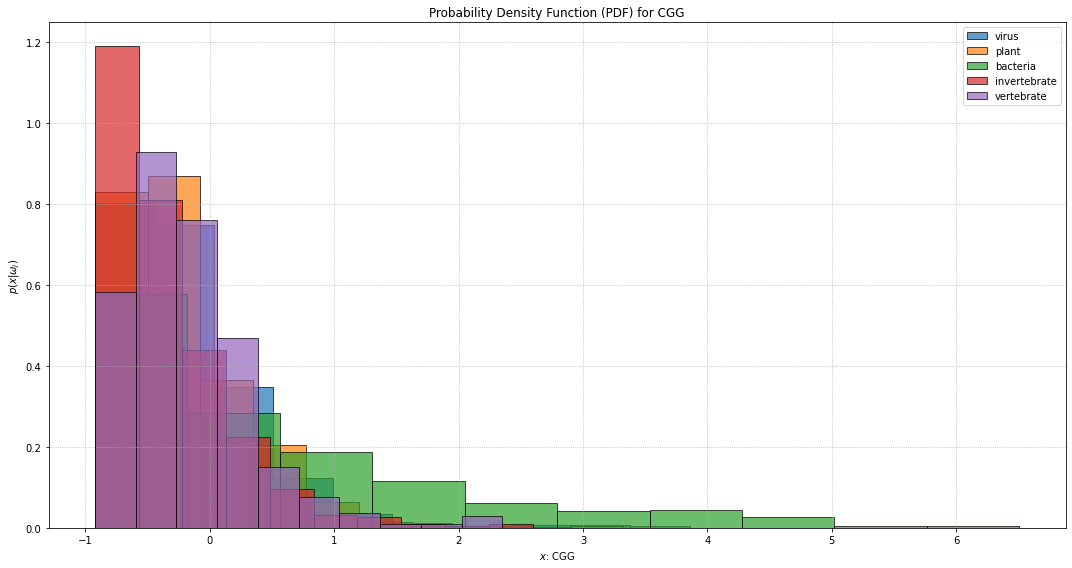

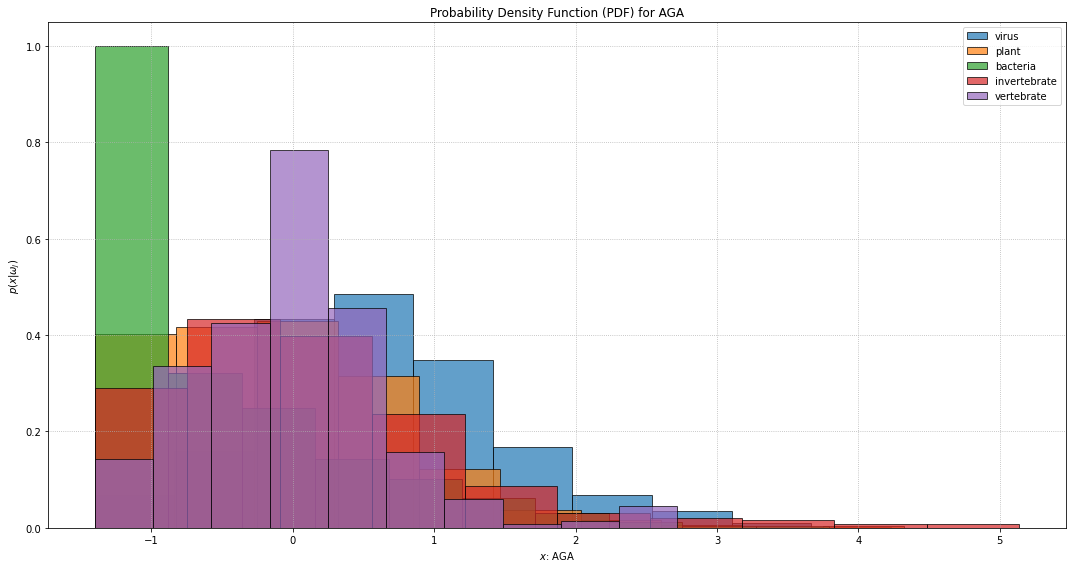

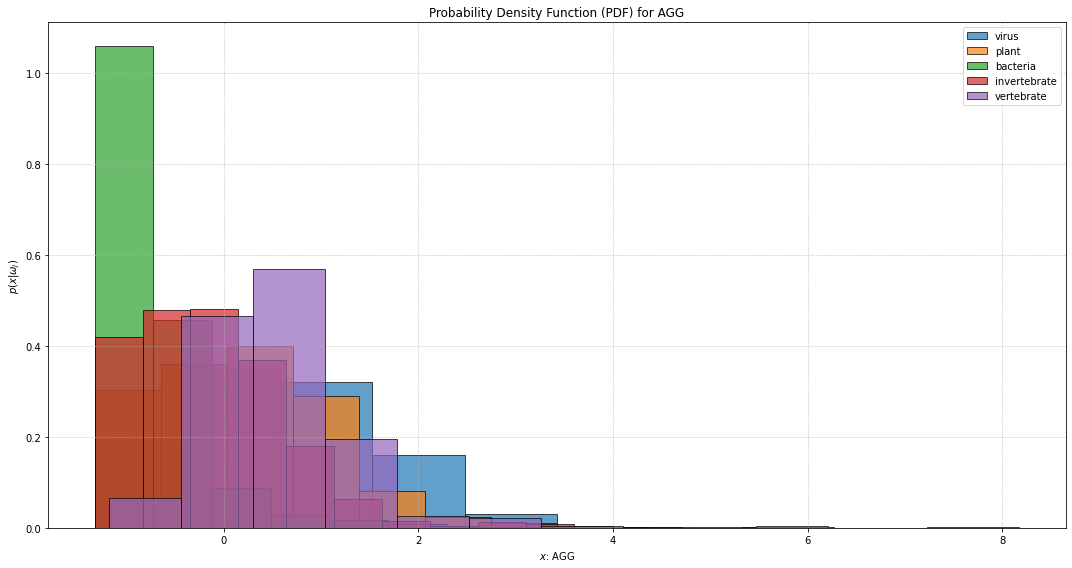

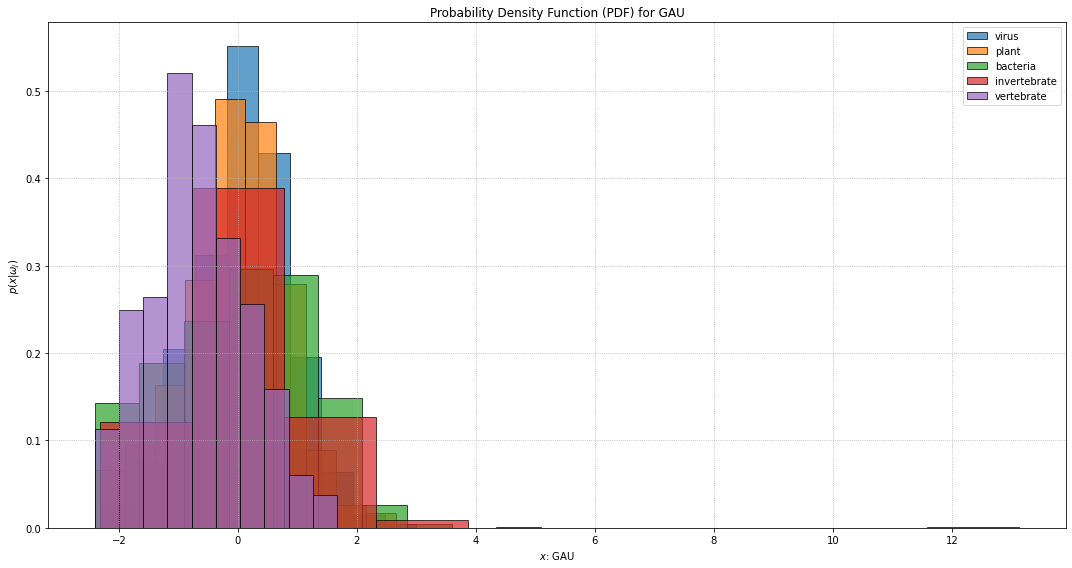

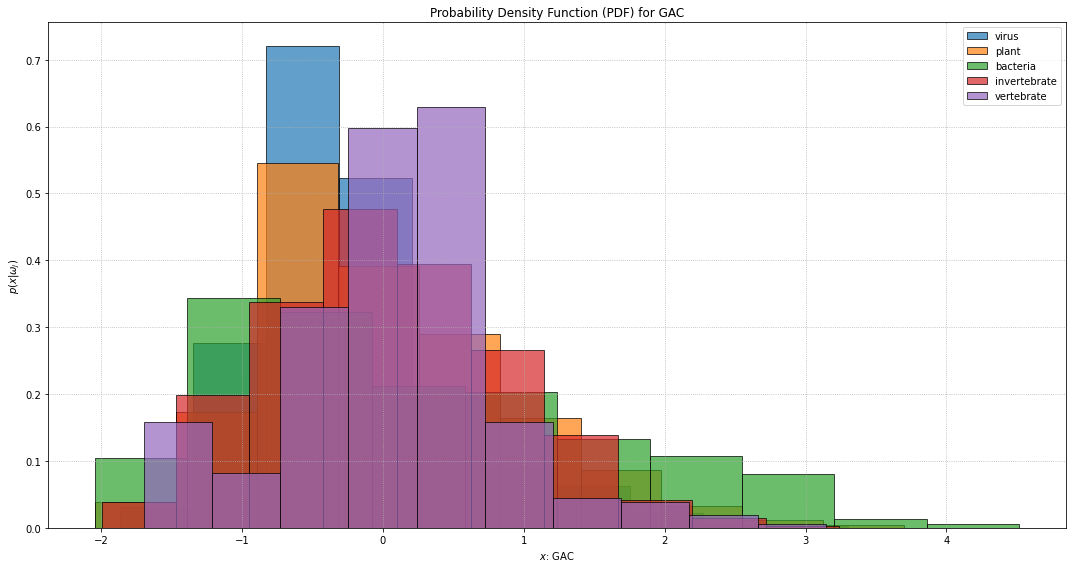

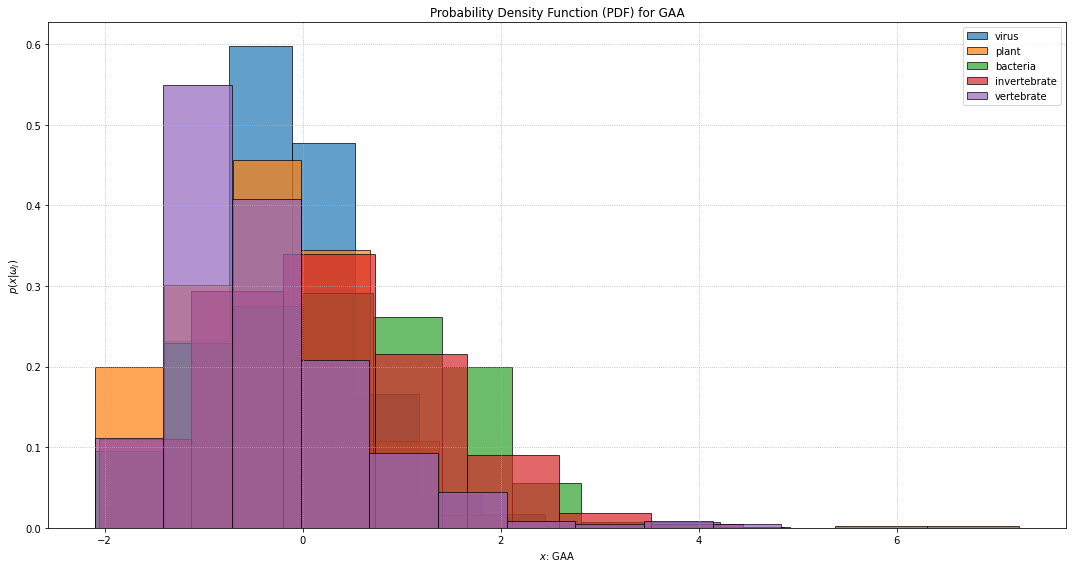

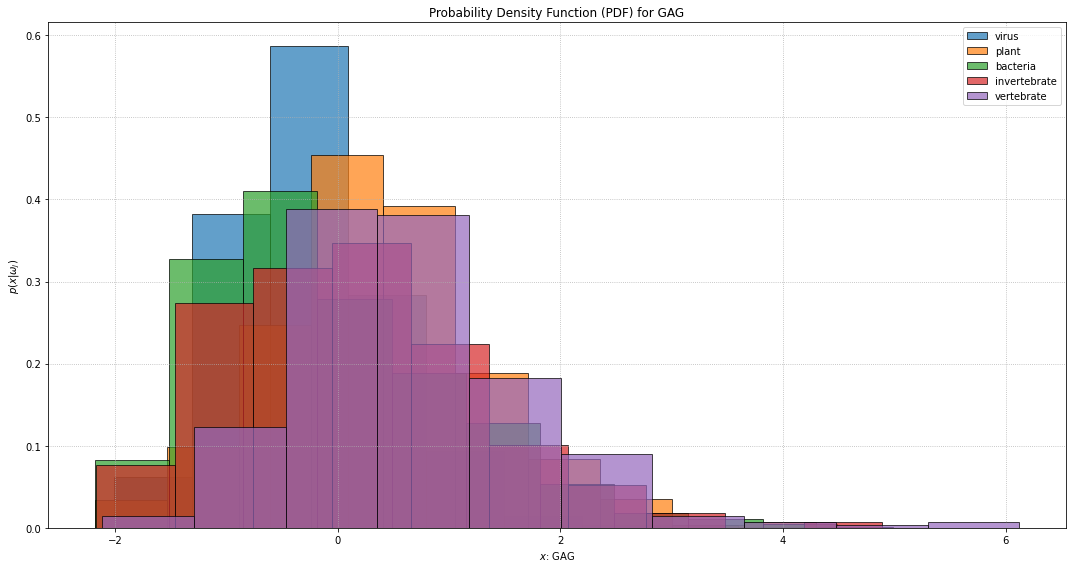

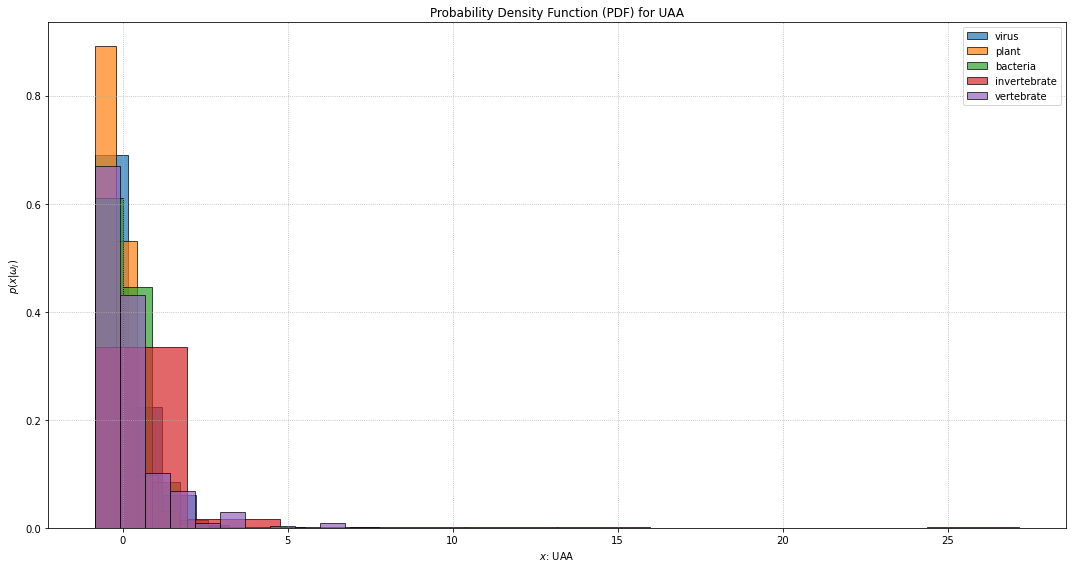

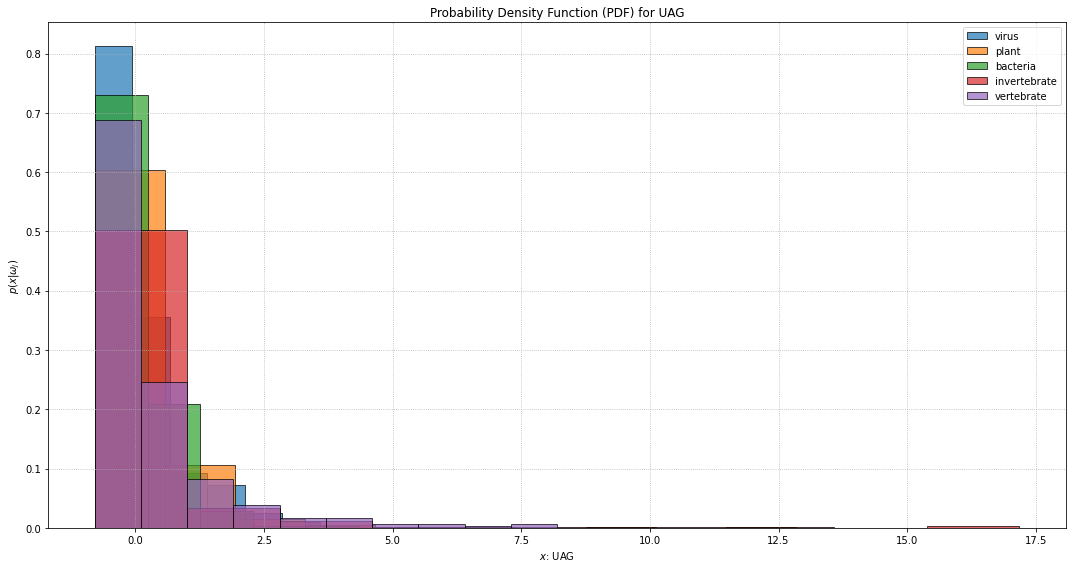

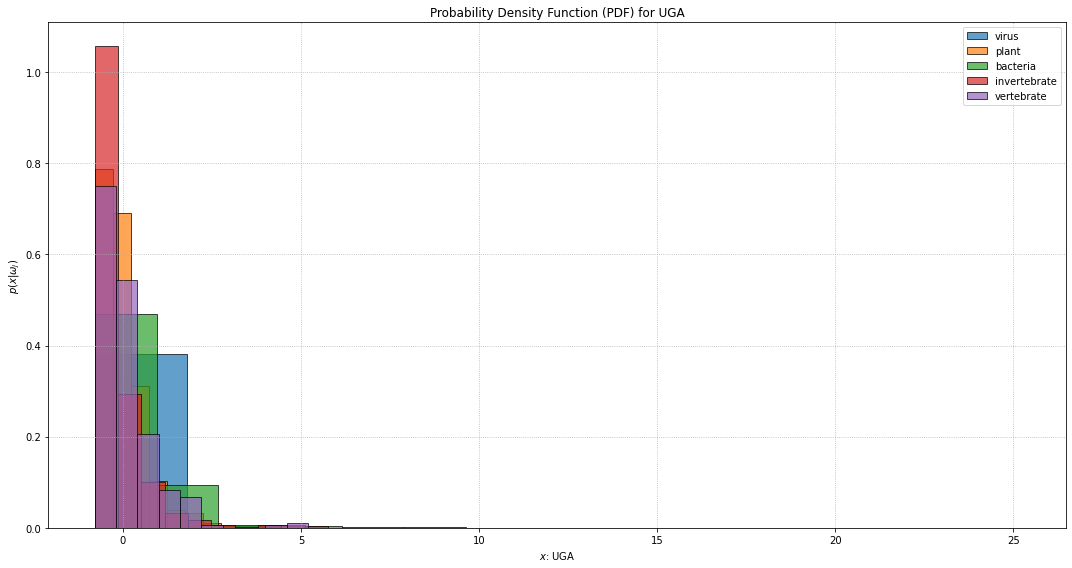

In [28]:
for plot in train_features.columns:
    plot_histograms(plot)

### 5. Histograms on features of interest

List of ten features is selected as feature of interest that showed signs of class separation on 1D histograms.

In [29]:
selected_codon_frequencies = ['AGA','AGG','CCG','CUG','GGC','GGG']

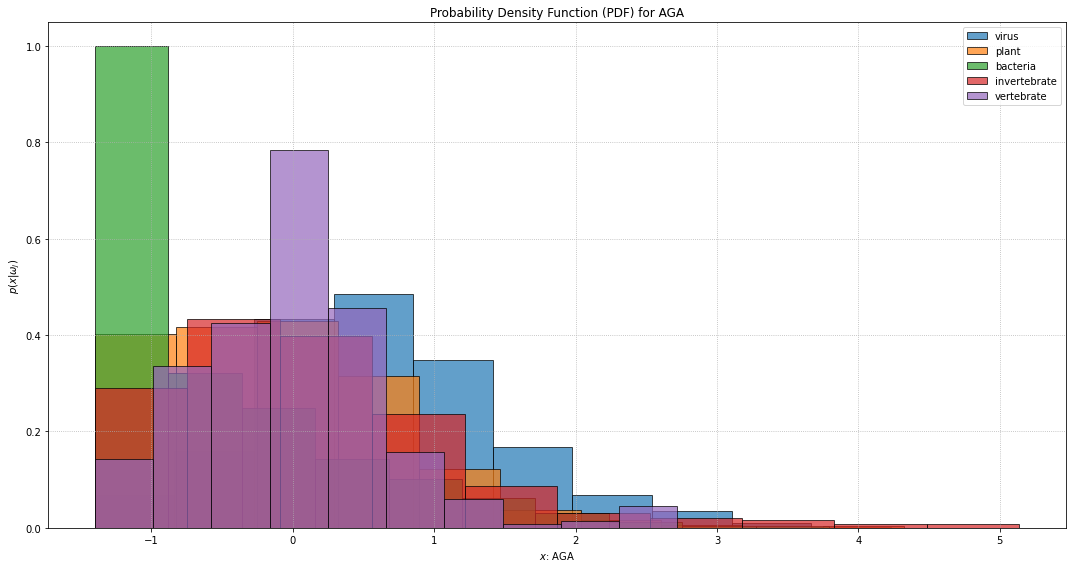

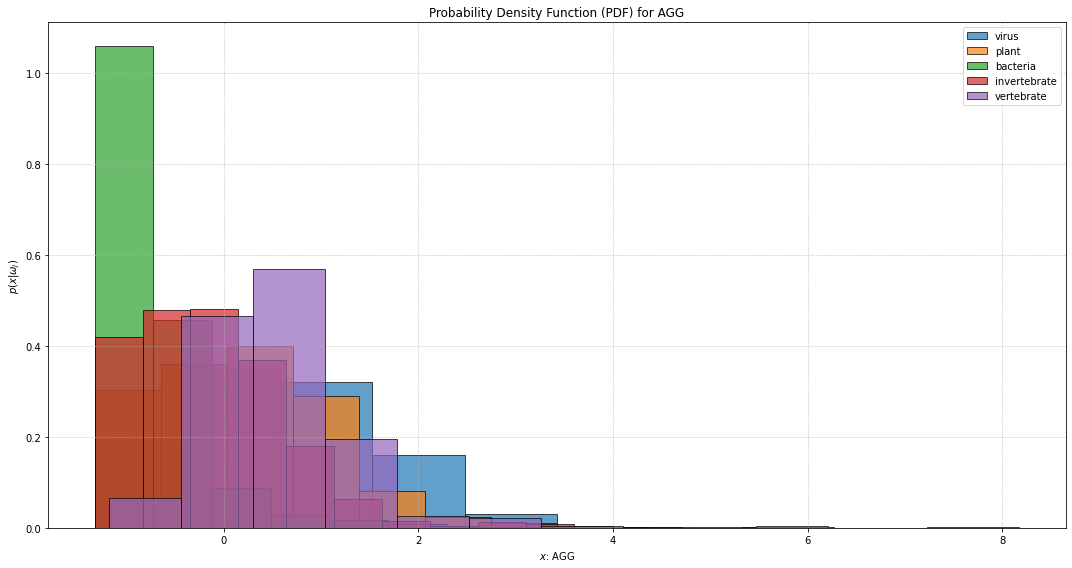

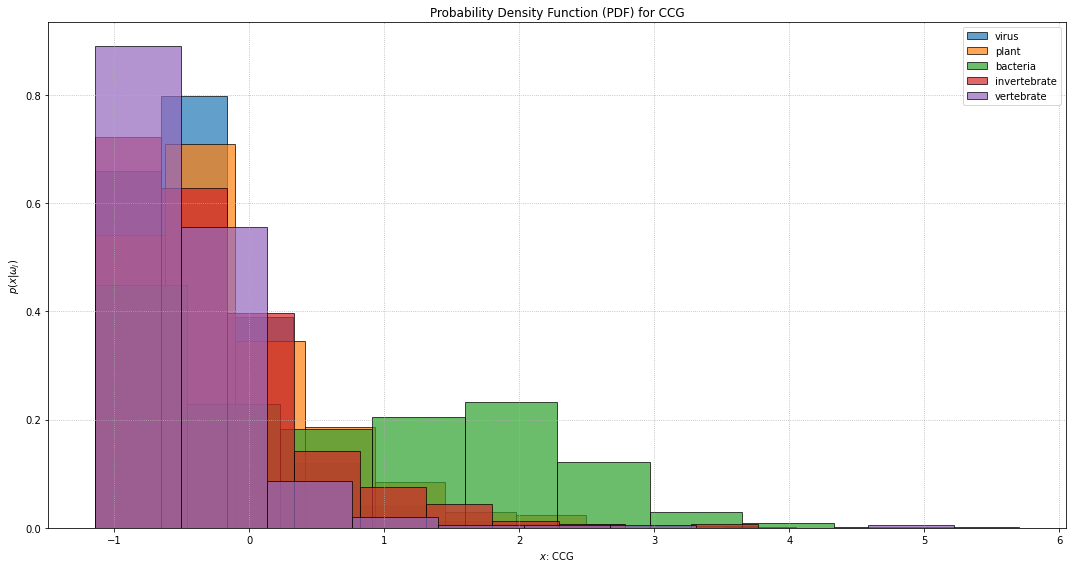

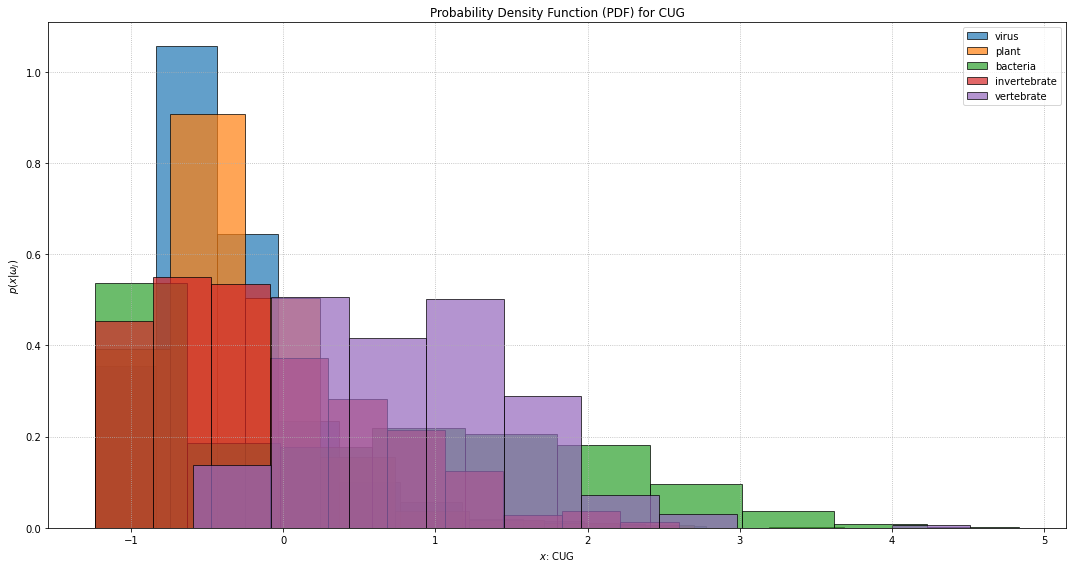

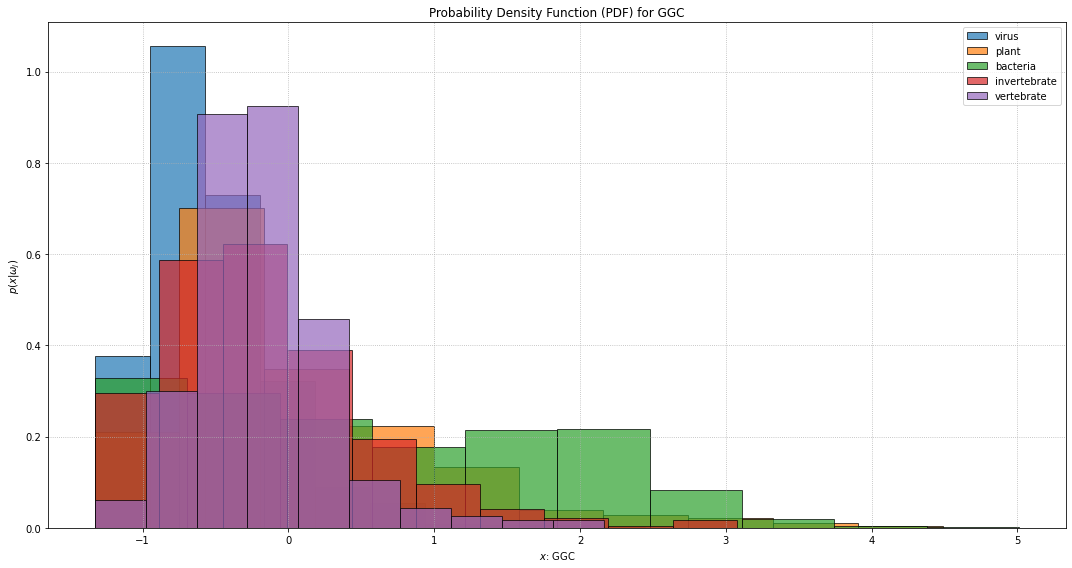

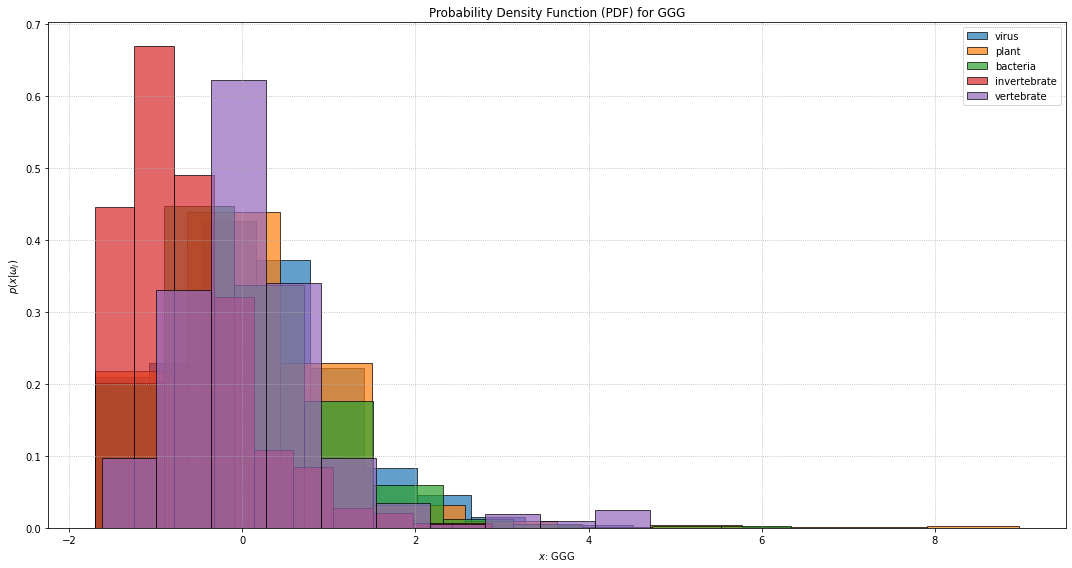

In [30]:
for codon in selected_codon_frequencies:
    plot_histograms(codon)

### 6. Pairplots for features of interest

In [31]:
train_features_pairplot = train_features_scaled[selected_codon_frequencies]
train_features_pairplot['Kingdom'] = train_labels_encoded['Kingdom']

In [44]:
def plot_pairplots(df):
    plot_1 = sns.pairplot(df, hue='Kingdom', plot_kws={'alpha': 0.4, 'edgecolor': None}, aspect=1)

    plot_1.fig.suptitle('Pair Plot of selected '+str(len(selected_codon_frequencies))+' Features', y=1.02)
    plot_1._legend.set_title("Kingdom")

    plt.show()

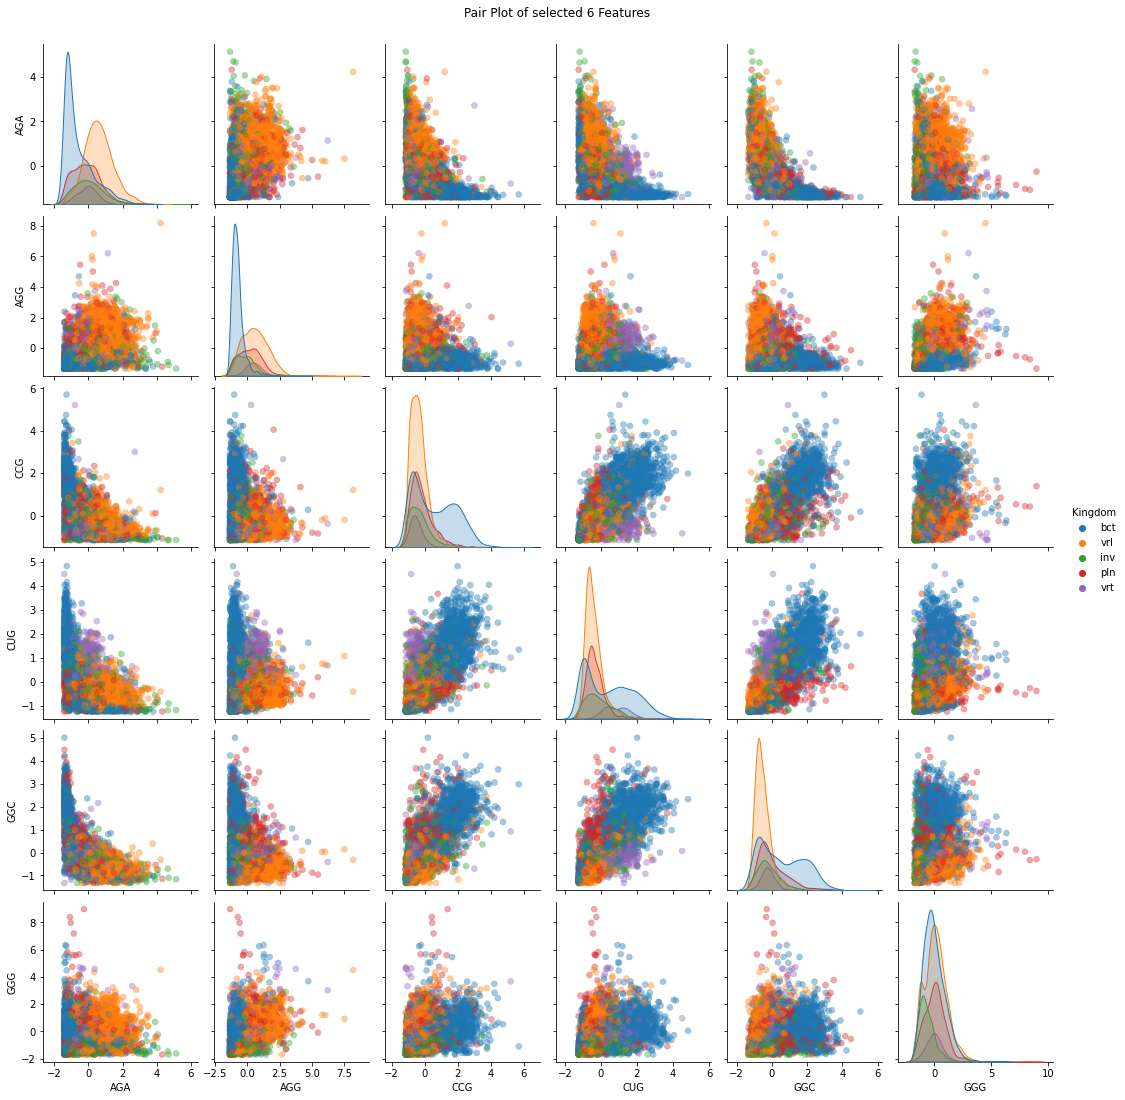

In [45]:
plot_pairplots(train_features_pairplot)

### 7. Magnified view of scatter plots for features of interest:

1. CUG v/s CCG
2. CUG v/s AGG
3. GGG v/s GGC

In [34]:
def plot_scatterplot(feature_1, feature_2):
    figure, axis = plt.subplots(figsize=(14,8))
    feature_1 = feature_1
    feature_2 = feature_2

    axis.scatter(bacteria[feature_1], bacteria[feature_2], alpha=.8, label="Bacteria")
    axis.scatter(invertebrate[feature_1], invertebrate[feature_2], alpha=.8, label="Invertebrate")
    axis.scatter(virus[feature_1], virus[feature_2], alpha=.8, label="Virus")
    axis.scatter(plant[feature_1], plant[feature_2], alpha=.8, label="Plant")
    axis.scatter(vertebrate[feature_1], vertebrate[feature_2], alpha=.8, label="Vertebrate")


    plt.title('Scatterplot for {} v/s {}'.format(feature_1, feature_2))
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.legend()
    plt.grid(linestyle=':')
    plt.show()

#### 1. CUG v/s CCG

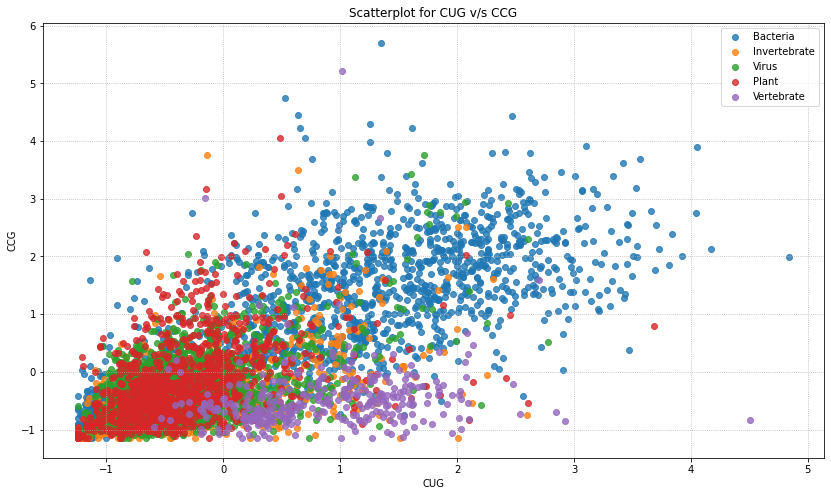

In [35]:
plot_scatterplot('CUG','CCG')

#### 2. CUG v/s AGG

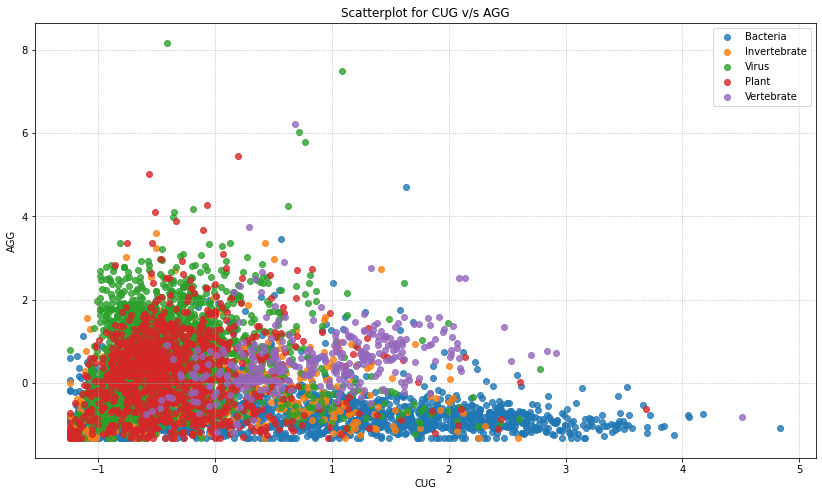

In [36]:
plot_scatterplot('CUG','AGG')

#### 3. GGG v/s GGC

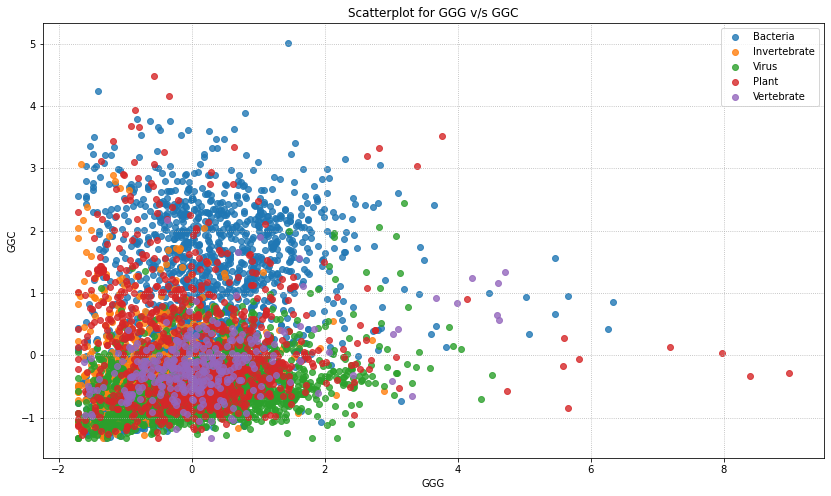

In [37]:
plot_scatterplot('GGG','GGC')

### 8. 3-D Scatter plots for selected features

In [38]:
from mpl_toolkits import mplot3d

def plot_3d_scatter(feature_1, feature_2, feature_3):
    
    # Creating dataset
    z = feature_1
    x = feature_2
    y = feature_3

    # Creating figure
    fig = plt.figure(figsize = (20, 12))
    ax = plt.axes(projection ="3d")


    # Creating plot
    ax.scatter3D(bacteria[x], bacteria[y], bacteria[z], label='Bacteria', alpha = 0.8,c = 'Blue',marker ='.')
    ax.scatter3D(virus[x], virus[y], virus[z], label='Virus', alpha = 0.8,c = 'Green',marker ='*')
    ax.scatter3D(plant[x], plant[y], plant[z], label='Plant', alpha = 0.8,c = 'Red',marker ='^')
    ax.scatter3D(vertebrate[x], vertebrate[y], vertebrate[z], label='Vertebrate', alpha = 0.8, c='Purple',marker ='o')
    ax.scatter3D(invertebrate[x], invertebrate[y], invertebrate[z], label='Invertebrate', alpha = 0.8,c = 'Orange',marker ='o')

    plt.title("3D Scatter plot for {}, {} and {}".format(feature_1, feature_2, feature_3))
    ax.set_xlabel(feature_1, fontweight ='bold')
    ax.set_ylabel(feature_2, fontweight ='bold')
    ax.set_zlabel(feature_3, fontweight ='bold')

    plt.legend()
    plt.show()

#### 1. CUG v/s GGG v/s CCG

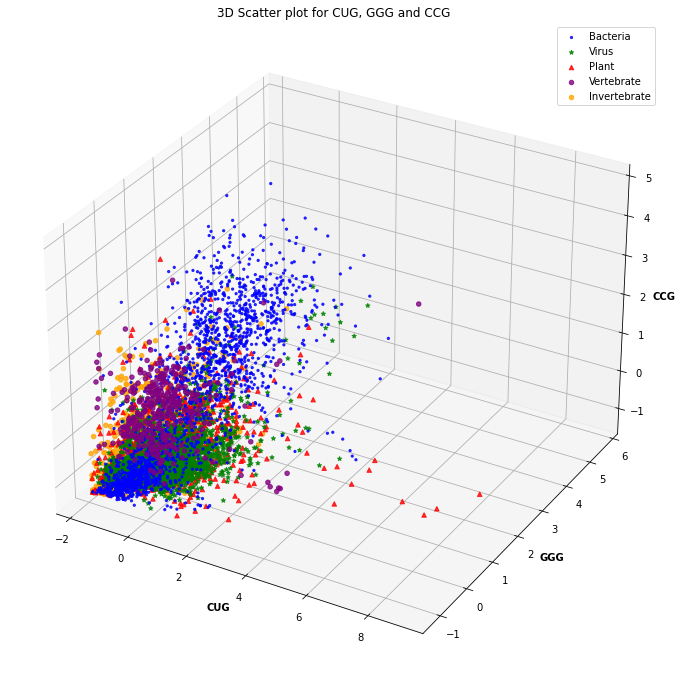

In [39]:
plot_3d_scatter('CUG','GGG','CCG')

#### 2. CUG v/s CCG v/s AGG

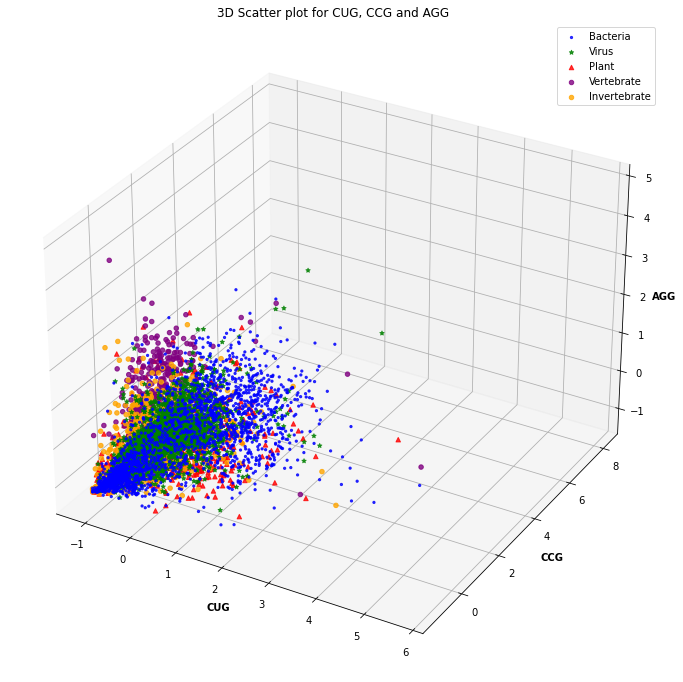

In [40]:
plot_3d_scatter('CUG', 'CCG', 'AGG')